In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error,mean_absolute_error, r2_score,f1_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from numpy import percentile
from scipy import stats
from scipy.stats import skew
import scipy.stats as stat
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [139]:
df = pd.read_csv("co2_emissions (1).csv")

In [140]:
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [141]:
df.head(20)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


In [142]:
df.info

<bound method DataFrame.info of        make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS

In [143]:
df.shape

(7385, 12)

In [144]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [145]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [146]:
df['make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [147]:
df['vehicle_class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [148]:
df['transmission'].unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

In [149]:
#Mapping similar labels into a single label for Transmission column

In [150]:
df["transmission"] = np.where(df["transmission"].isin(["A"]), "Automatic", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AM"]), "Automated Manual", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AS"]), "Automatic with Select Shift", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AV"]), "Continuously Variable", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["M"]), "Manual", df["transmission"])

In [151]:
df['transmission'].unique()

array(['Automatic with Select Shift', 'Manual', 'Continuously Variable',
       'Automated Manual', 'Automatic'], dtype=object)

In [152]:
df['fuel_type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [153]:
#Changing the labels into a meaningful label

In [154]:
df['fuel_type'] = np.where(df['fuel_type']=="Z", "Premium Gasoline", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type']=="X", "Regular Gasoline", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type']=="D", "Diesel", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type']=="E", "Ethanol(E85)",df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type']=="N", "Natural Gas", df['fuel_type'])

In [155]:
df['fuel_type'].unique()

array(['Premium Gasoline', 'Diesel', 'Regular Gasoline', 'Ethanol(E85)',
       'Natural Gas'], dtype=object)

In [156]:
df['model'].nunique()

2053

In [157]:
df.head(20)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,Automatic with Select Shift,Premium Gasoline,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,Automatic with Select Shift,Premium Gasoline,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,Automatic with Select Shift,Premium Gasoline,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,Manual,Premium Gasoline,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,Automatic with Select Shift,Premium Gasoline,10.6,7.5,9.2,31,212


In [158]:
#Frequency Distribution of different Categorical Variables

In [159]:
# 1.Feature: make

Make
-------------  ---
FORD           628
CHEVROLET      588
BMW            527
MERCEDES-BENZ  419
PORSCHE        376
TOYOTA         330
GMC            328
AUDI           286
NISSAN         259
JEEP           251
DODGE          246
KIA            231
HONDA          214
HYUNDAI        210
MINI           204
VOLKSWAGEN     197
MAZDA          180
LEXUS          178
JAGUAR         160
CADILLAC       158
SUBARU         140
VOLVO          124
INFINITI       108
BUICK          103
RAM             97
LINCOLN         96
MITSUBISHI      95
CHRYSLER        88
LAND ROVER      85
FIAT            73
ACURA           72
MASERATI        61
ROLLS-ROYCE     50
ASTON MARTIN    47
BENTLEY         46
LAMBORGHINI     41
ALFA ROMEO      30
GENESIS         25
SCION           22
SMART            7
BUGATTI          3
SRT              2
-------------  ---


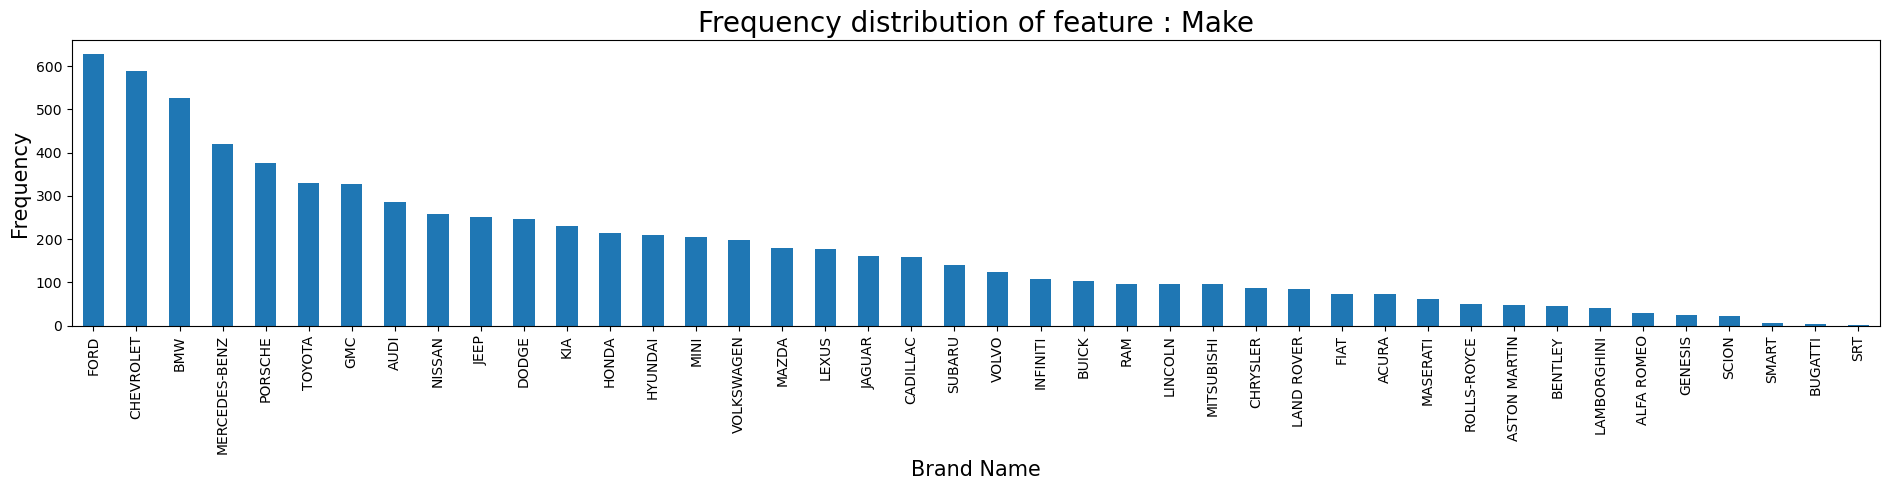

In [160]:
from tabulate import tabulate
print("Make")
print(tabulate(pd.DataFrame(df.make.value_counts())))

plt.figure(figsize=(19,5));
df.groupby("make")["make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [161]:
#2.Feature: model,working with Top 20 model

Top 20 car models out of total 2053 car models
-------------  --
F-150 FFV 4X4  32
F-150 FFV      32
MUSTANG        27
FOCUS FFV      24
SONIC          20
SONIC 5        20
F-150 4X4      20
F-150          20
ACCORD         19
COMPASS        19
JETTA          19
ATS            19
TACOMA 4WD     19
SILVERADO 4WD  18
FORTE 5        18
SILVERADO      18
CAMARO         18
SIERRA 4WD     18
COROLLA        18
SIERRA         18
-------------  --


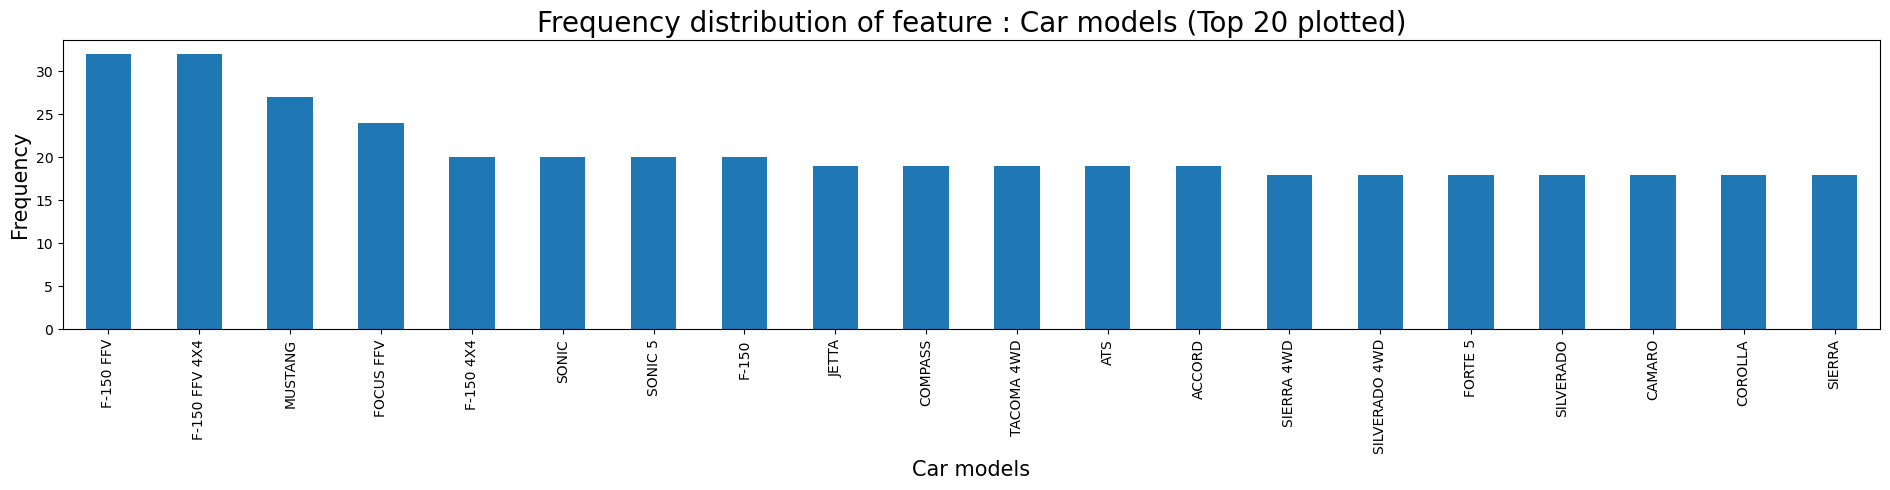

In [162]:
print(f"Top 20 car models out of total {df.model.nunique()} car models")
print(tabulate(pd.DataFrame(df.model.value_counts().sort_values(ascending=False)[:20])))

plt.figure(figsize=(19,5));
df.groupby("model")["model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature : Car models (Top 20 plotted)", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Car models", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [163]:
#3. Feature: vehicle_class

Vehicle Class
------------------------  ----
SUV - SMALL               1217
MID-SIZE                  1133
COMPACT                   1022
SUV - STANDARD             735
FULL-SIZE                  639
SUBCOMPACT                 606
PICKUP TRUCK - STANDARD    538
TWO-SEATER                 460
MINICOMPACT                326
STATION WAGON - SMALL      252
PICKUP TRUCK - SMALL       159
MINIVAN                     80
SPECIAL PURPOSE VEHICLE     77
VAN - PASSENGER             66
STATION WAGON - MID-SIZE    53
VAN - CARGO                 22
------------------------  ----


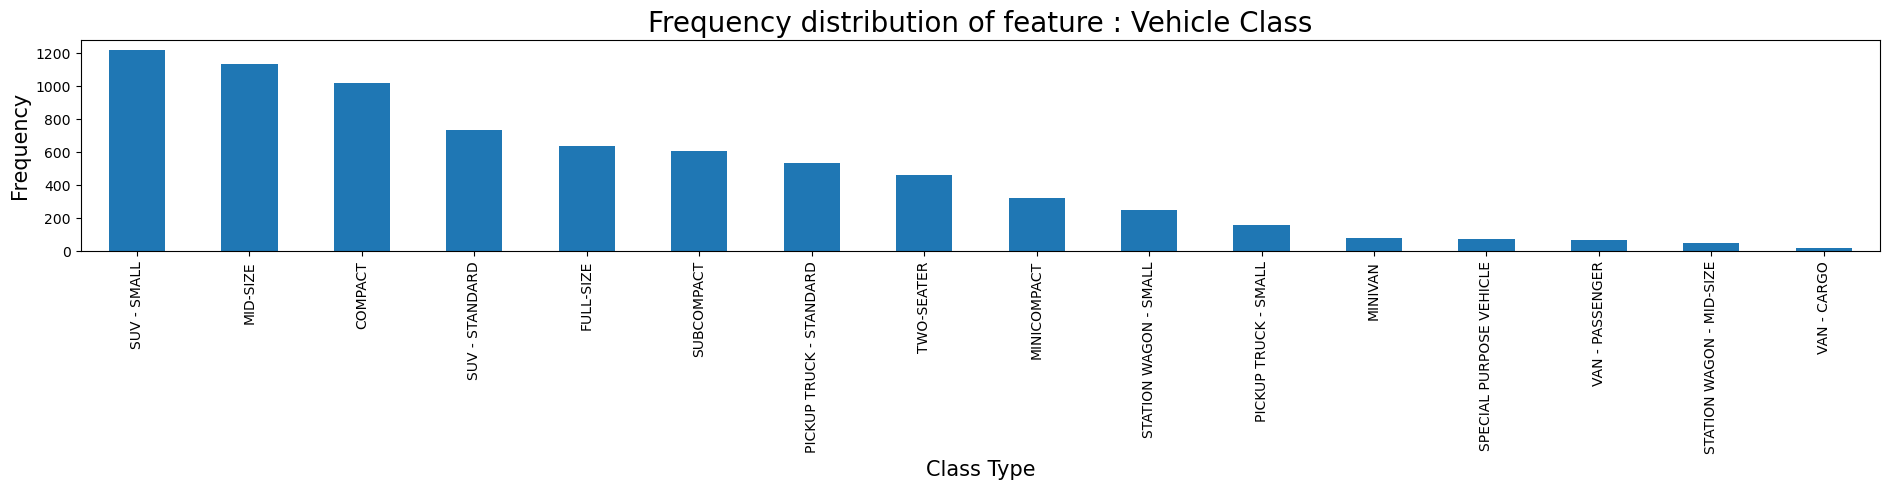

In [164]:
print("Vehicle Class")
print(tabulate(pd.DataFrame(df["vehicle_class"].value_counts())))

plt.figure(figsize=(19,5));
df.groupby("vehicle_class")["vehicle_class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Vehicle Class", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Class Type", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [165]:
#4. Feature: transmission

Transmission
---------------------------  ----
Automatic with Select Shift  3127
Automatic                    1851
Manual                       1185
Automated Manual              646
Continuously Variable         576
---------------------------  ----


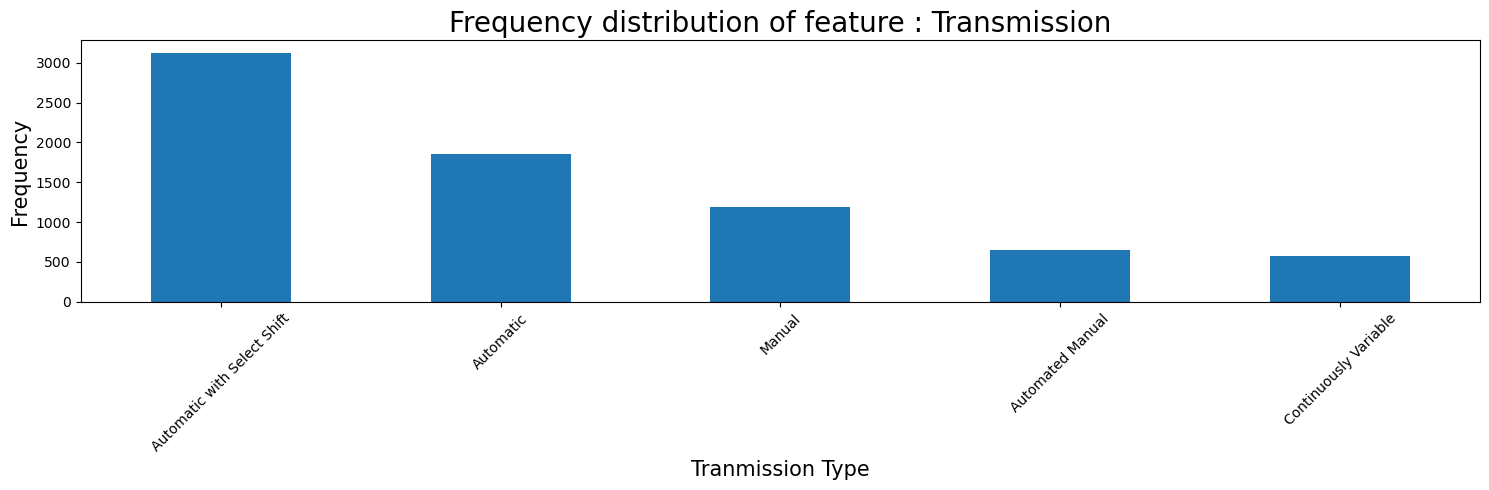

In [166]:
print("Transmission")
print(tabulate(pd.DataFrame(df.transmission.value_counts())))

plt.figure(figsize=(15,5));
df.groupby("transmission")["transmission"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Transmission", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Tranmission Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [167]:
#5. Feature: fuel_type

Fuel Type
----------------  ----
Regular Gasoline  3637
Premium Gasoline  3202
Ethanol(E85)       370
Diesel             175
Natural Gas          1
----------------  ----


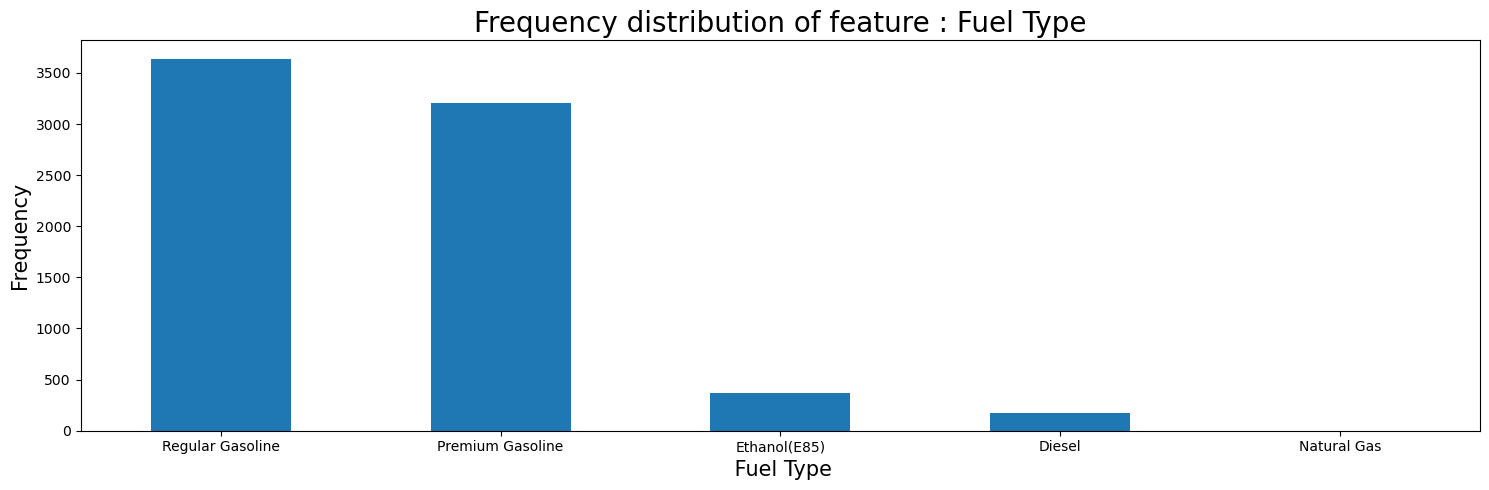

In [168]:
print("Fuel Type")
print(tabulate(pd.DataFrame(df["fuel_type"].value_counts())))

plt.figure(figsize=(15,5));
df.groupby("fuel_type")["fuel_type"].count().sort_values(ascending=False).plot(kind="bar")

plt.title("Frequency distribution of feature : Fuel Type", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel(" Fuel Type", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [169]:
#Variation in CO2 emissions with different features

In [170]:
#1. Feature: make

Text(0, 0.5, 'co2_emissions')

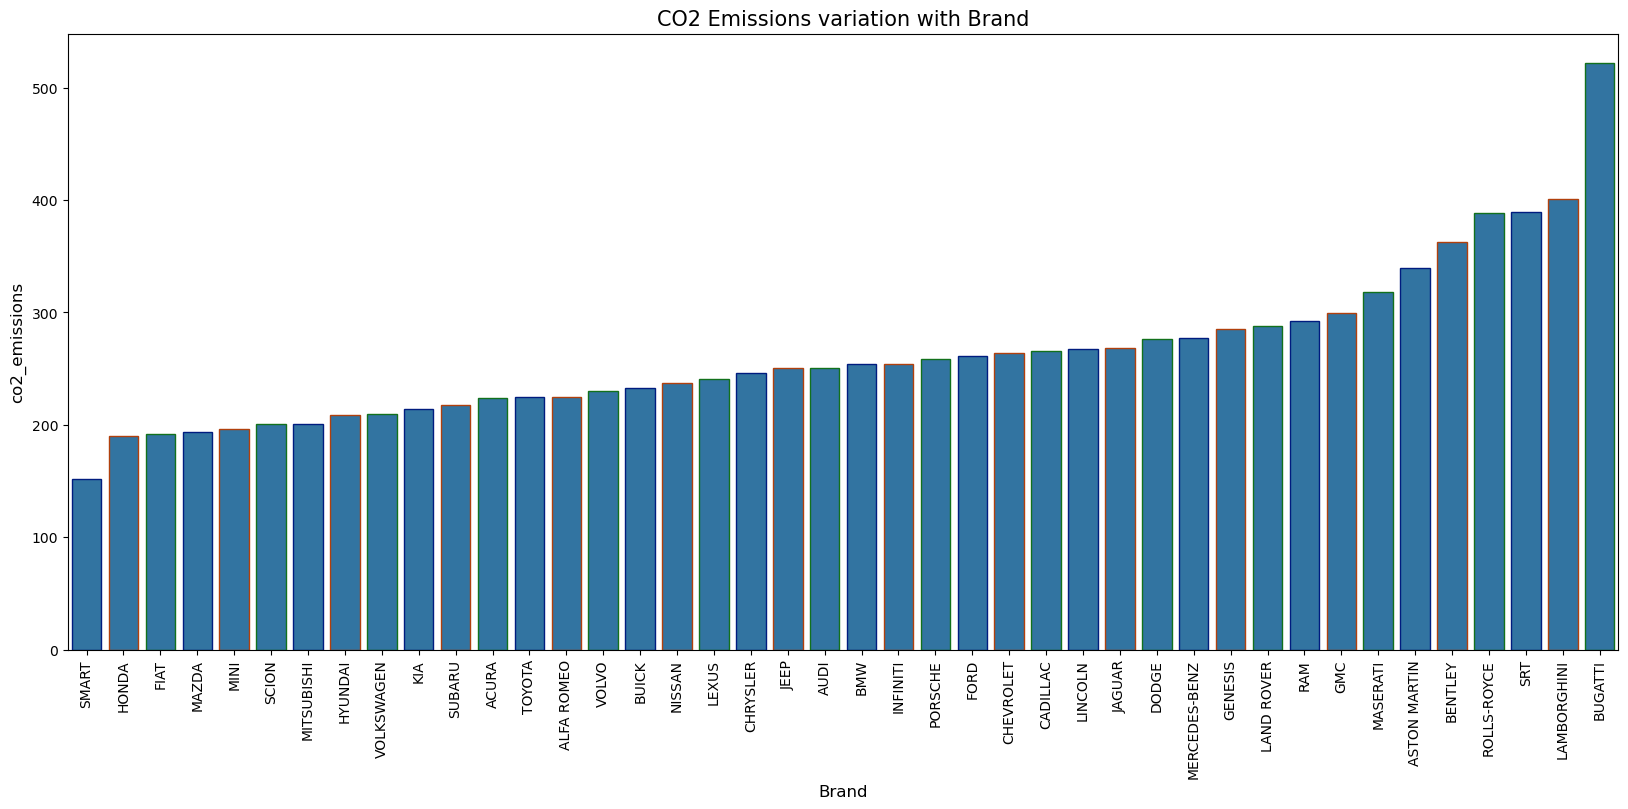

In [171]:
CO2_make = df.groupby(['make'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "make",y="co2_emissions",data = CO2_make,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Brand', fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('co2_emissions', fontsize=12)

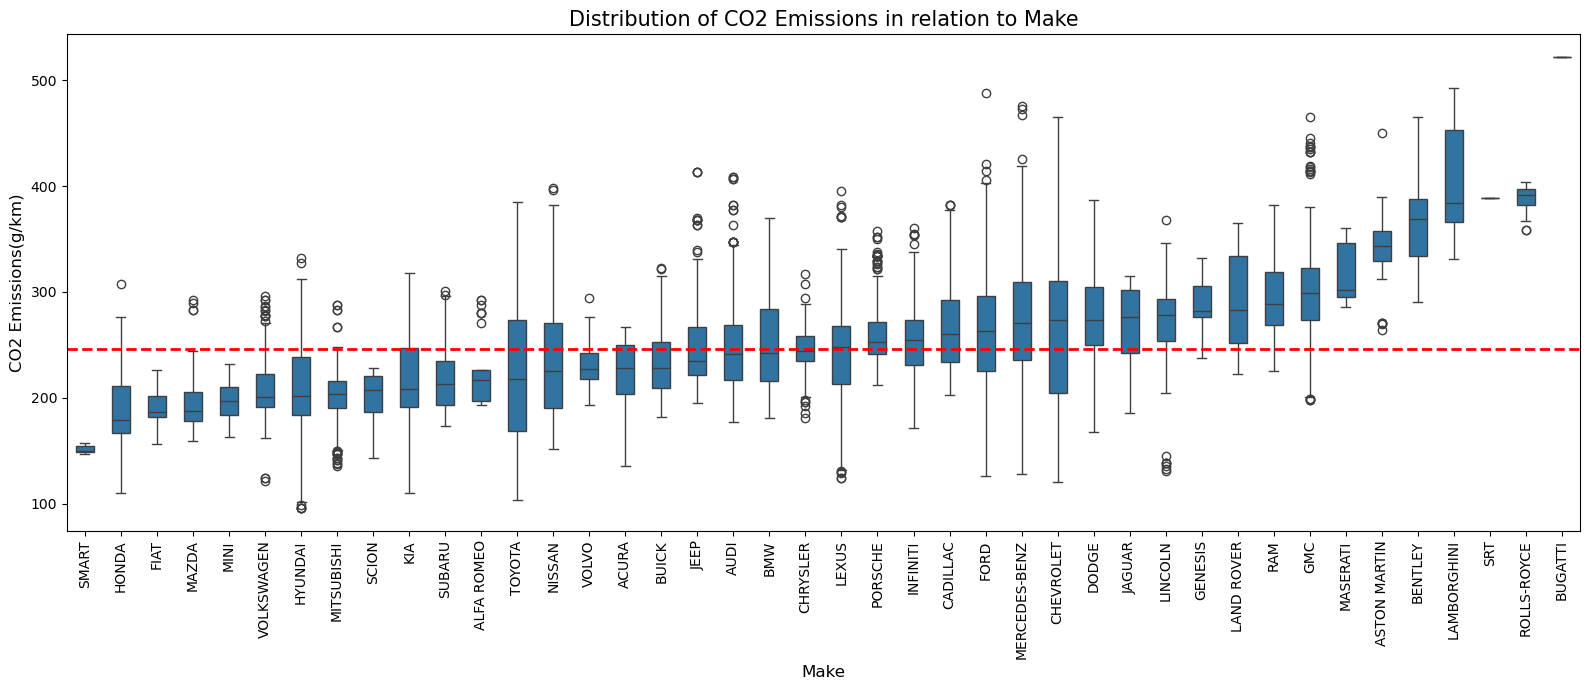

In [172]:
plt.figure(figsize=(16,7))
order = df.groupby("make")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="make", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [173]:
#2. Feature: vehicle_class

Text(0, 0.5, 'CO2 Emissions(g/km)')

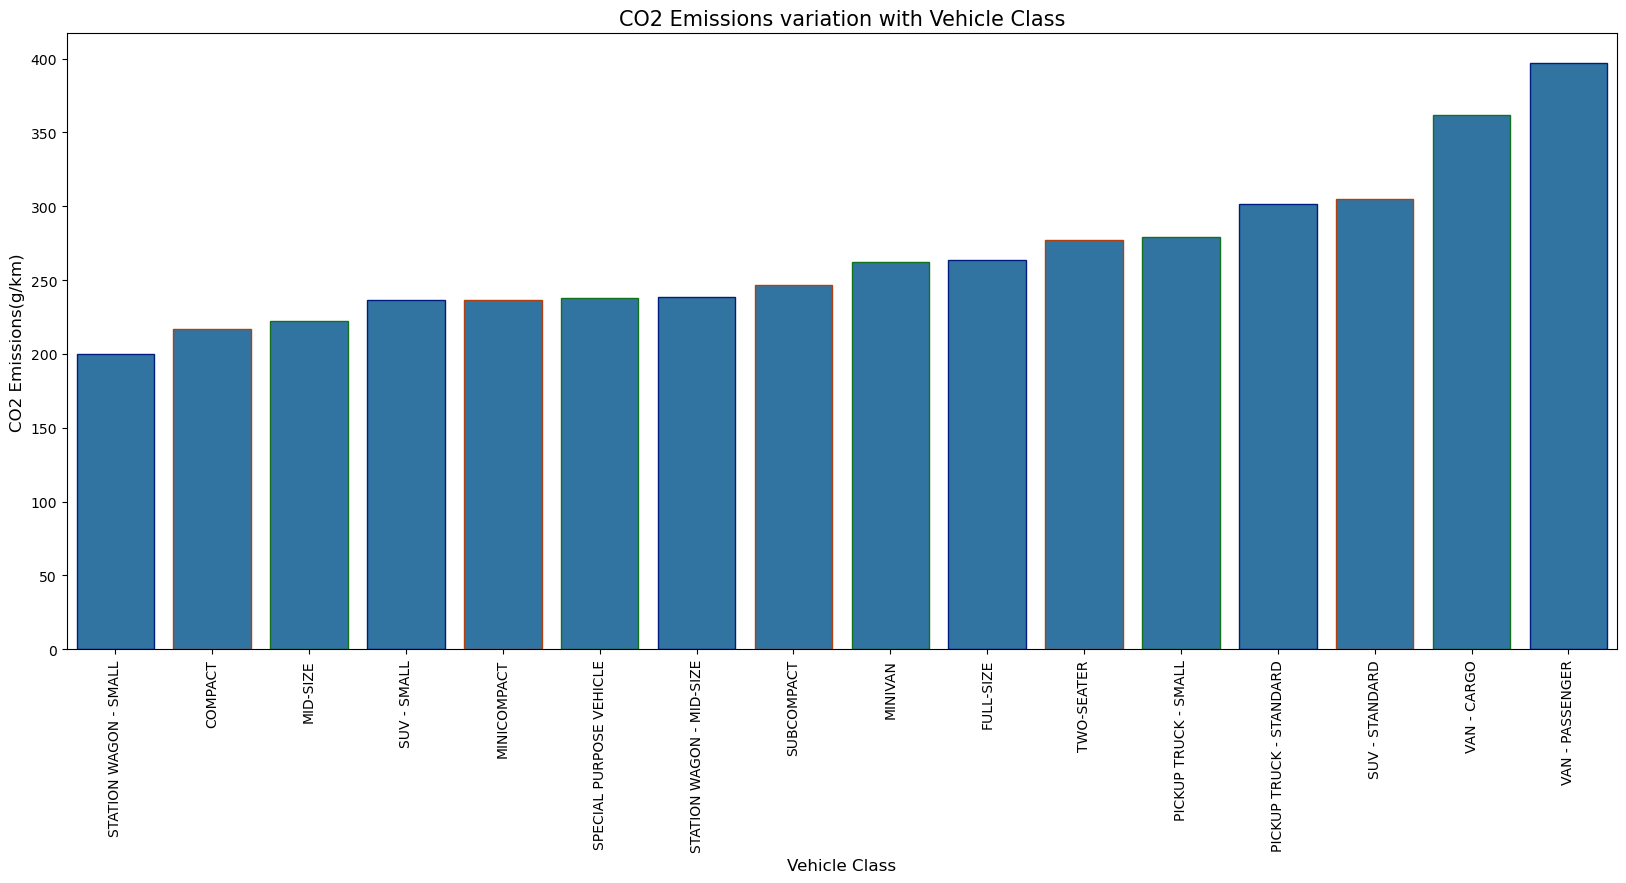

In [174]:
CO2_class = df.groupby(['vehicle_class'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "vehicle_class",y="co2_emissions",data = CO2_class,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Vehicle Class', fontsize=15)
plt.xlabel('Vehicle Class', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

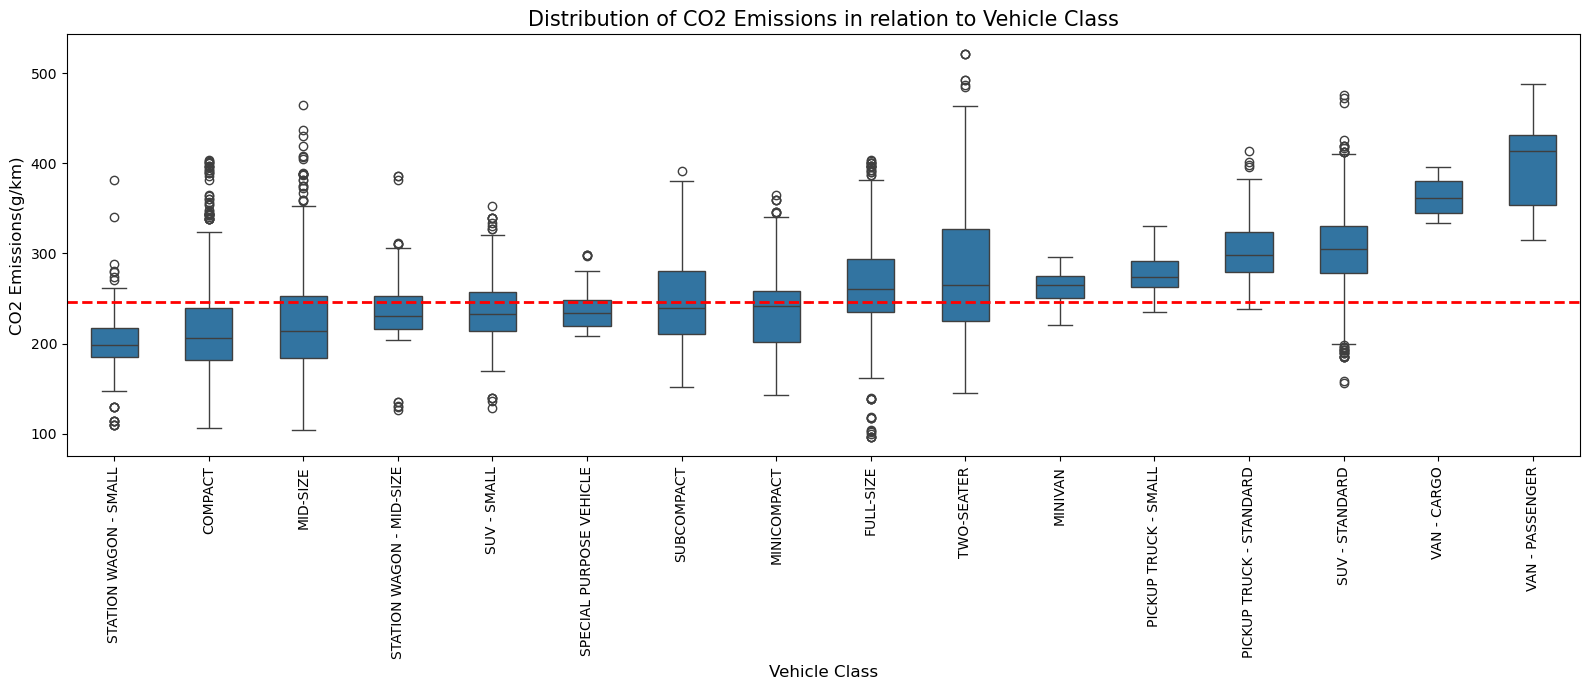

In [175]:
plt.figure(figsize=(16,7))
order = df.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [176]:
#3. Feature: transmission

Text(0, 0.5, 'CO2 Emissions(g/km)')

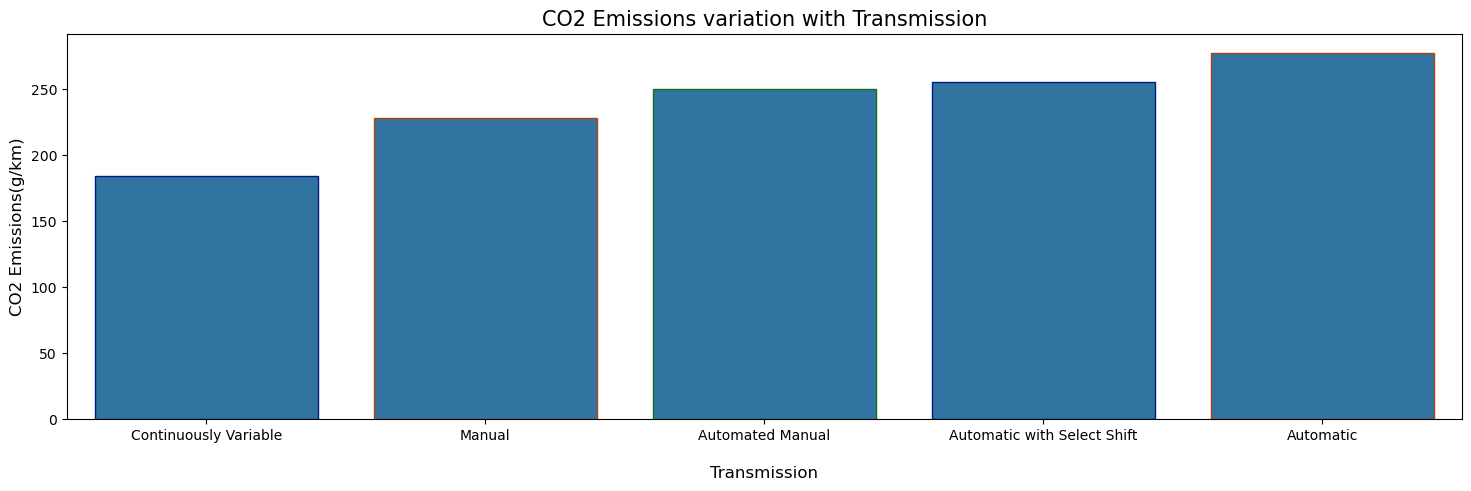

In [177]:
CO2_transmission = df.groupby(["transmission"])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(18,5))
sns.barplot(x = "transmission",y="co2_emissions", data = CO2_transmission,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('\nTransmission', fontsize=12)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

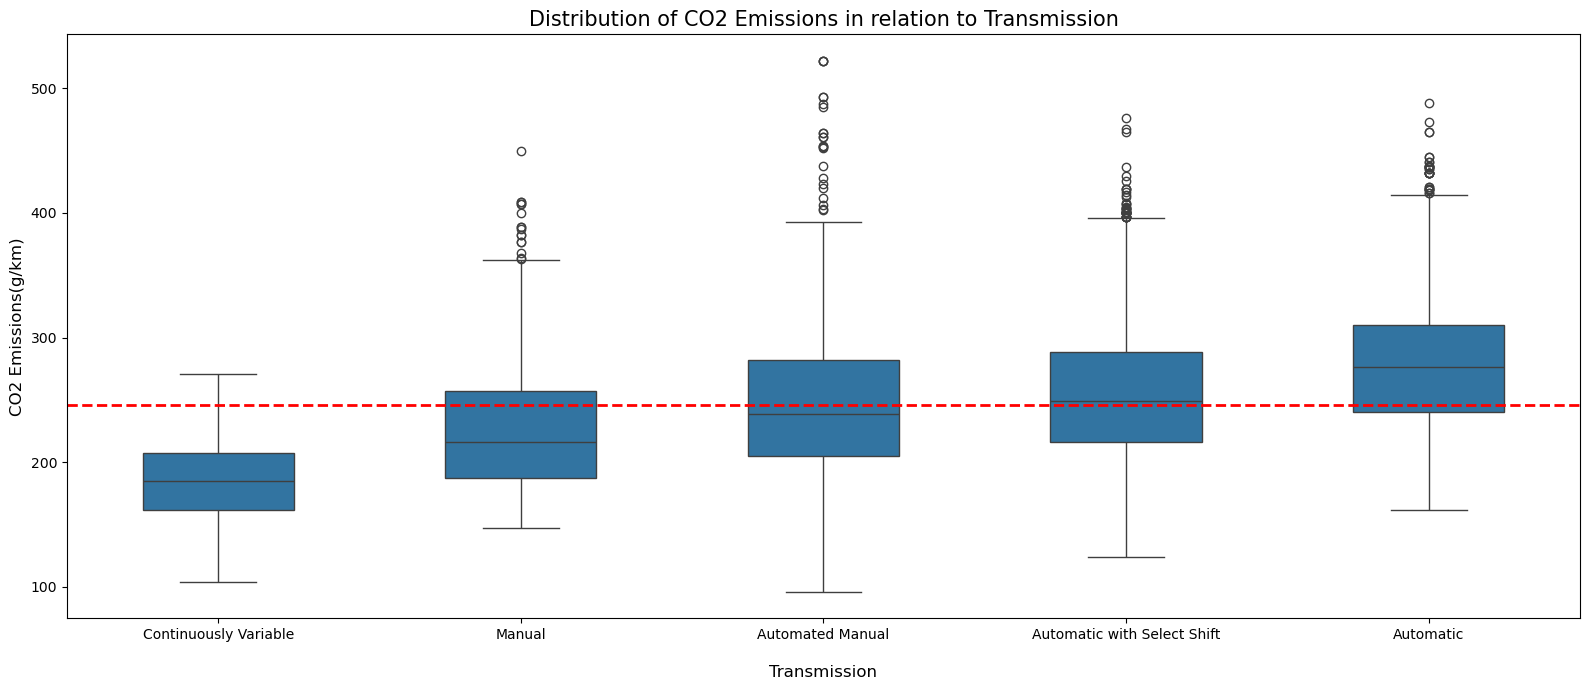

In [178]:
plt.figure(figsize=(16,7))
order = df.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=15)
plt.xlabel("\nTransmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [179]:
#4. Feature: fuel_type

Text(0, 0.5, 'CO2 Emissions(g/km)')

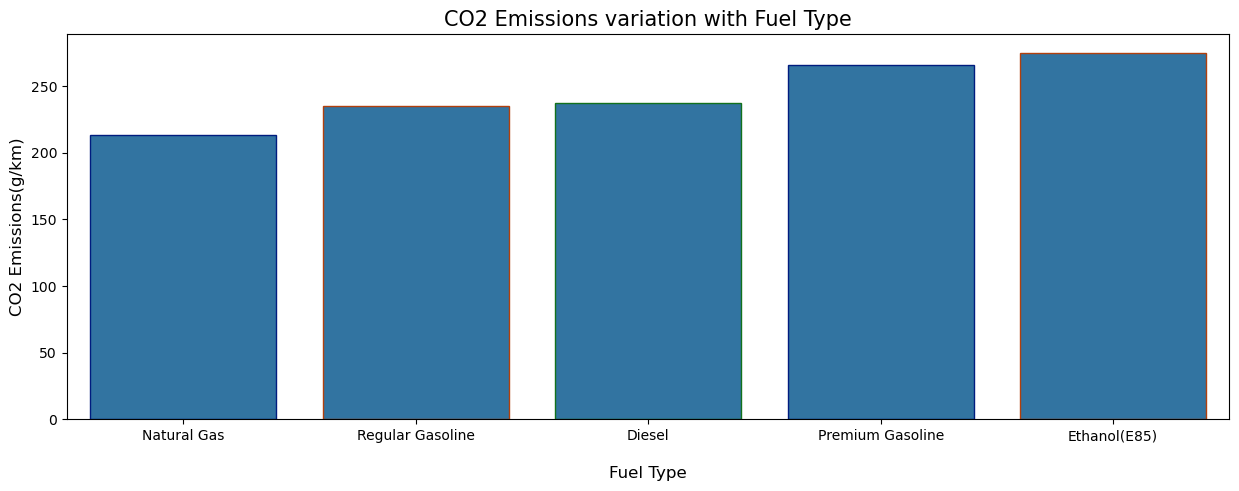

In [180]:
CO2_fuel_type = df.groupby(['fuel_type'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "fuel_type",y="co2_emissions",data = CO2_fuel_type,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Fuel Type', fontsize=15)
plt.xlabel('\nFuel Type', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

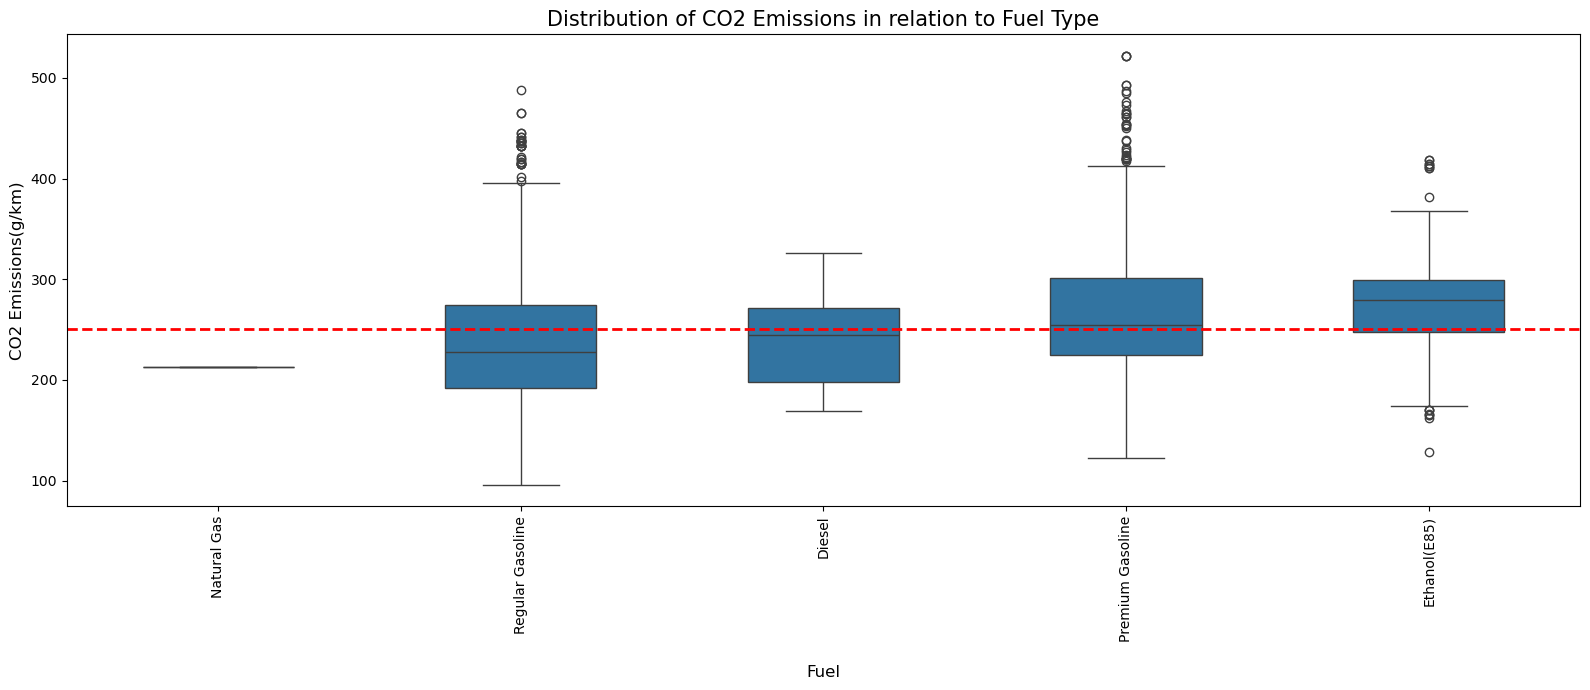

In [181]:
plt.figure(figsize=(16,7))
order = df.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nFuel", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [182]:
#Checking the shape of the distribution and skewness of Numeric columns

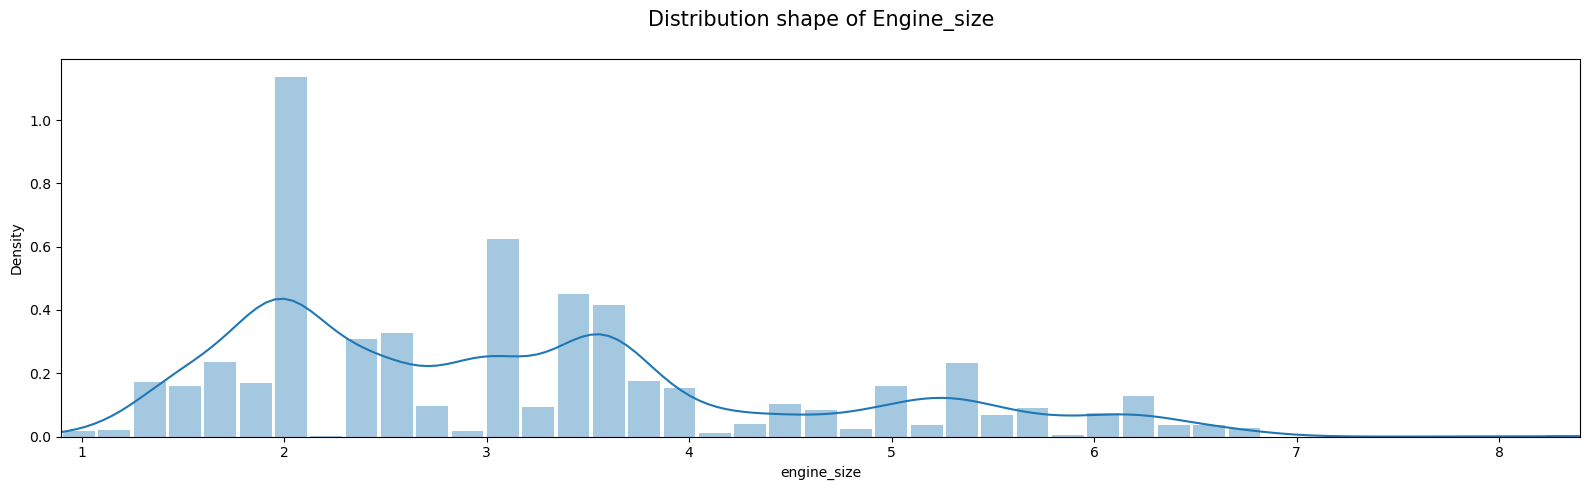

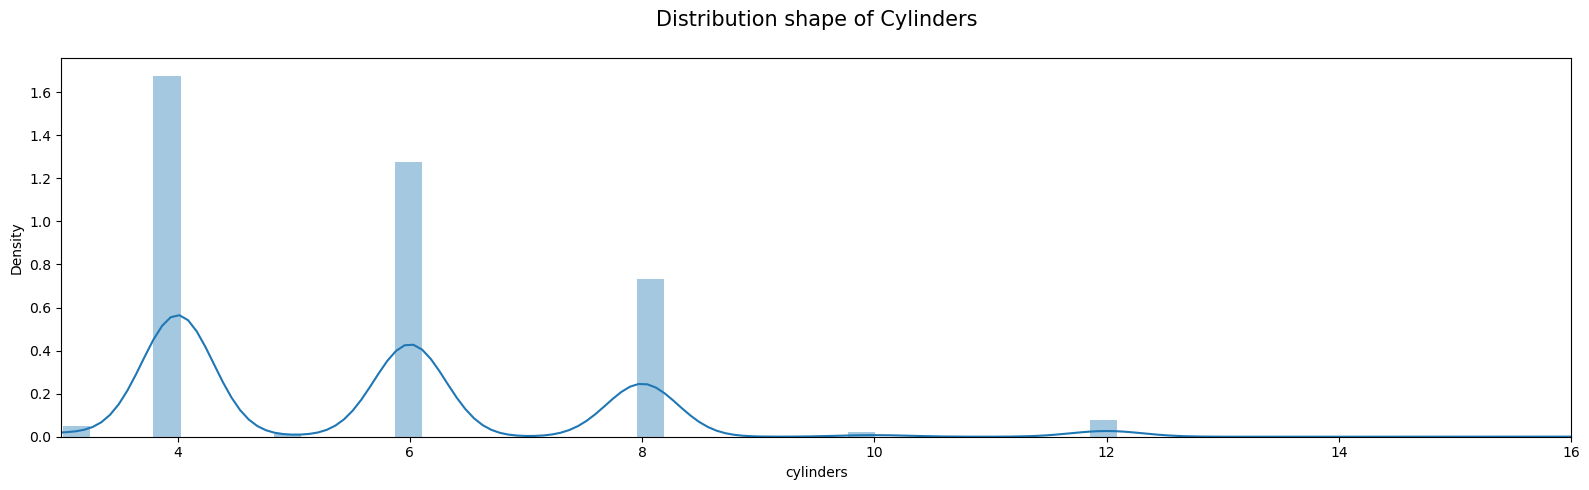

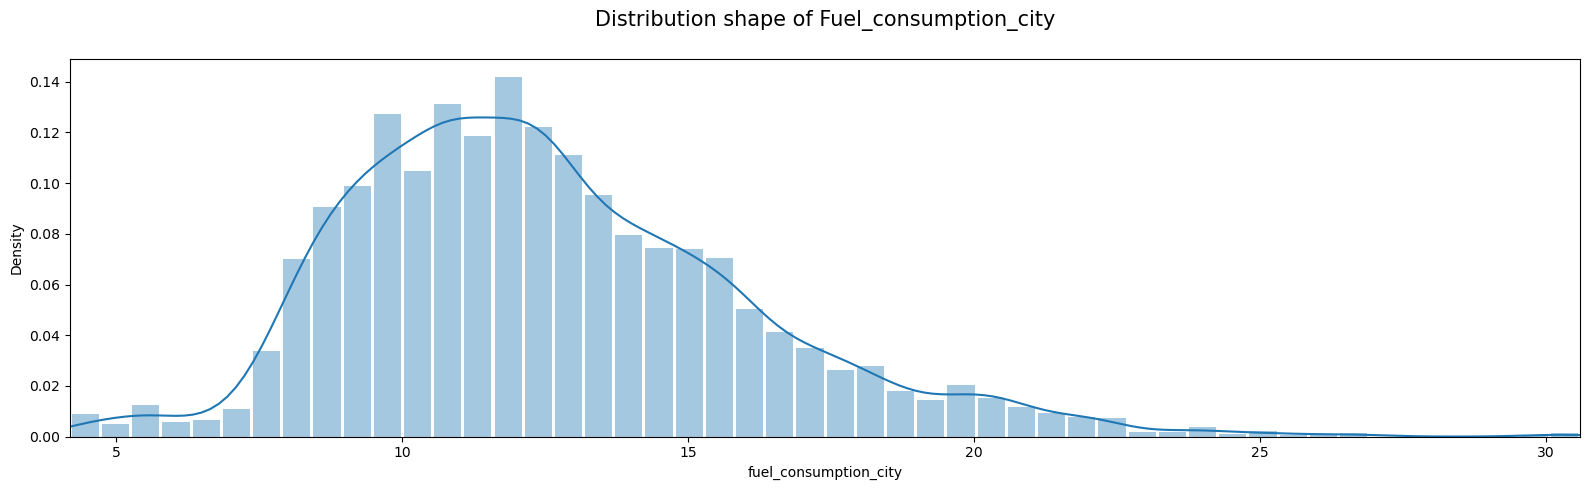

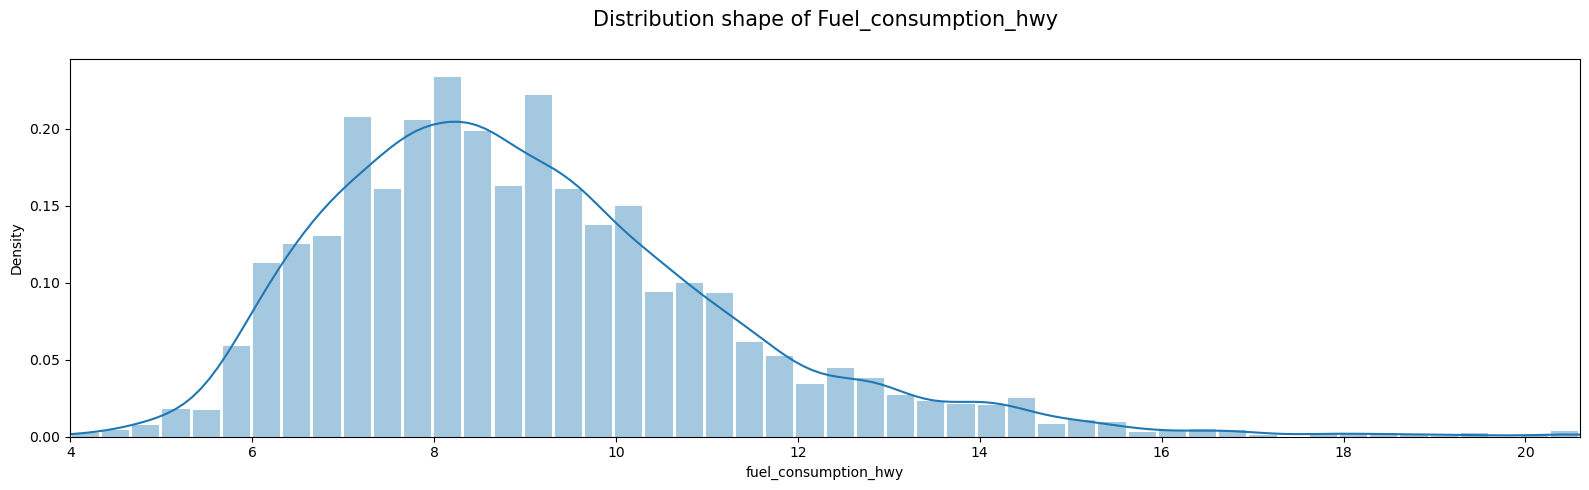

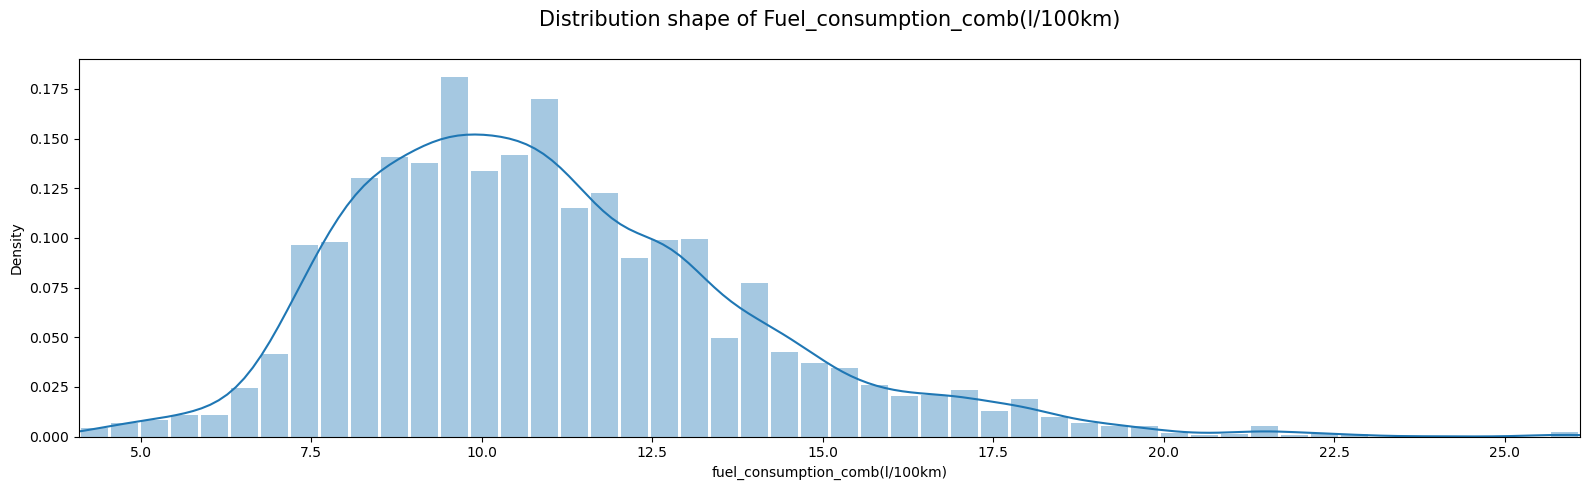

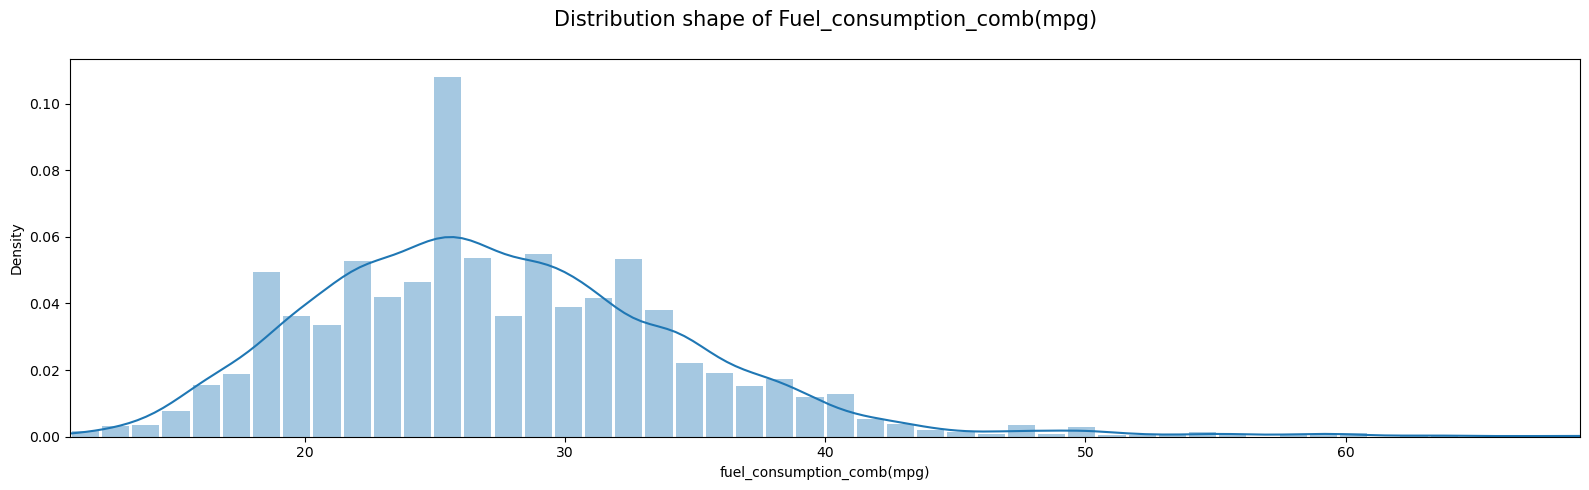

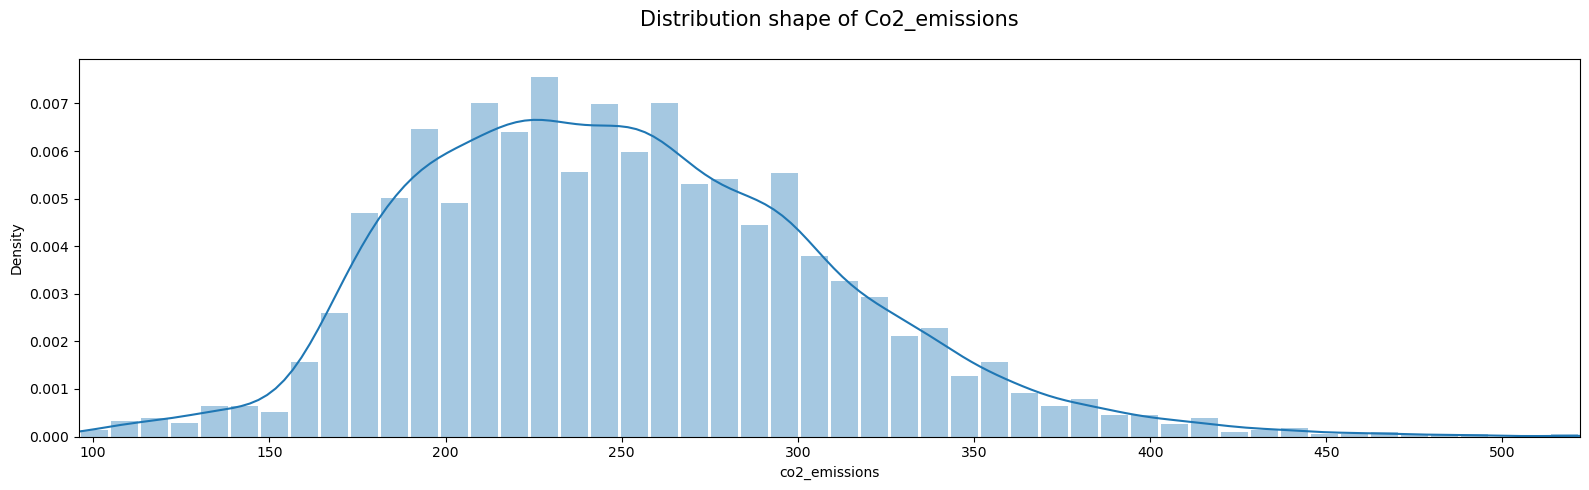

In [183]:
for feature in df.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(df[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(df[feature].min(), df[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

In [184]:
#To visualize the distribution of the dependent varibale using a Frequency Distribution plot and a Box plot

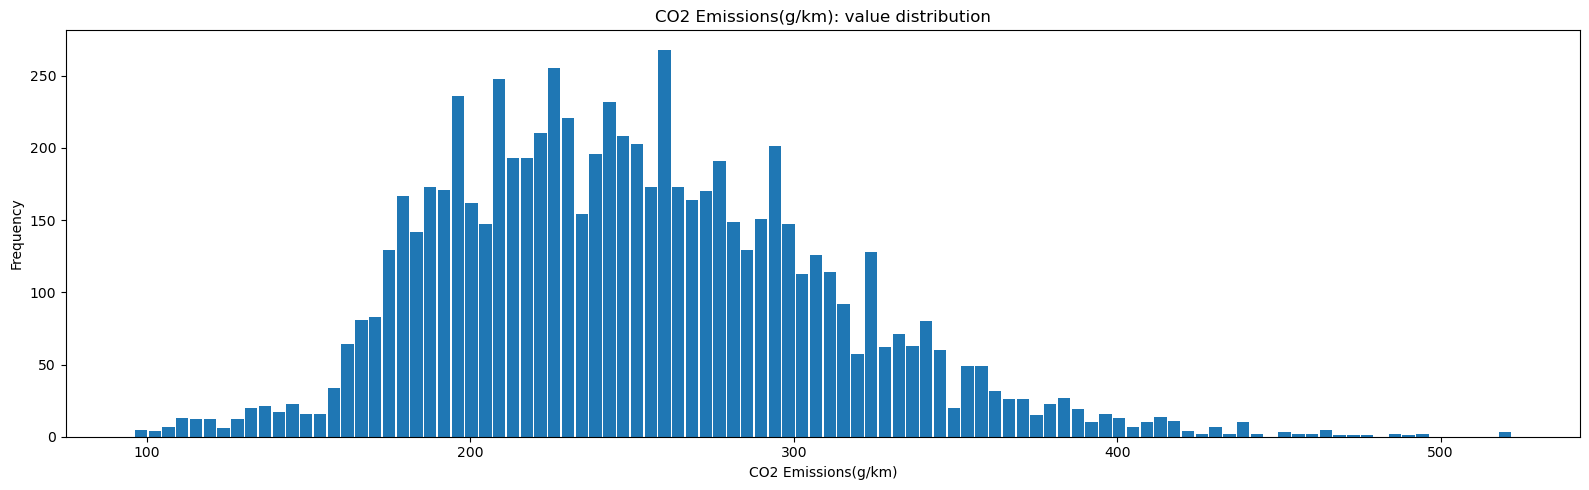

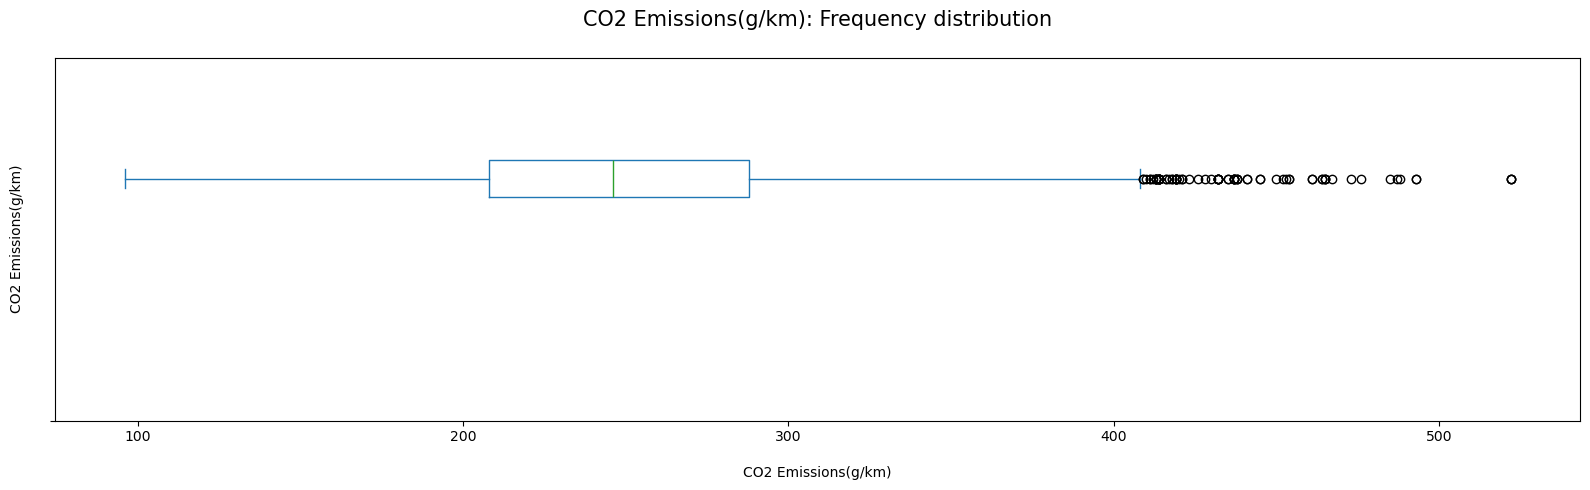

In [185]:
plt.figure(figsize=(16,5))
df["co2_emissions"].plot(kind="hist", bins=100, rwidth=0.9)
plt.title("CO2 Emissions(g/km): value distribution")
plt.xlabel("CO2 Emissions(g/km)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
df["co2_emissions"].plot(kind="box", vert=False)
plt.title("CO2 Emissions(g/km): Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2 Emissions(g/km)")
plt.yticks([0], [''])
plt.ylabel("CO2 Emissions(g/km)\n", rotation=90)
plt.tight_layout()
plt.show()

In [186]:
#Correlation Matrix

The numerical columns in the dataset are:  Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')


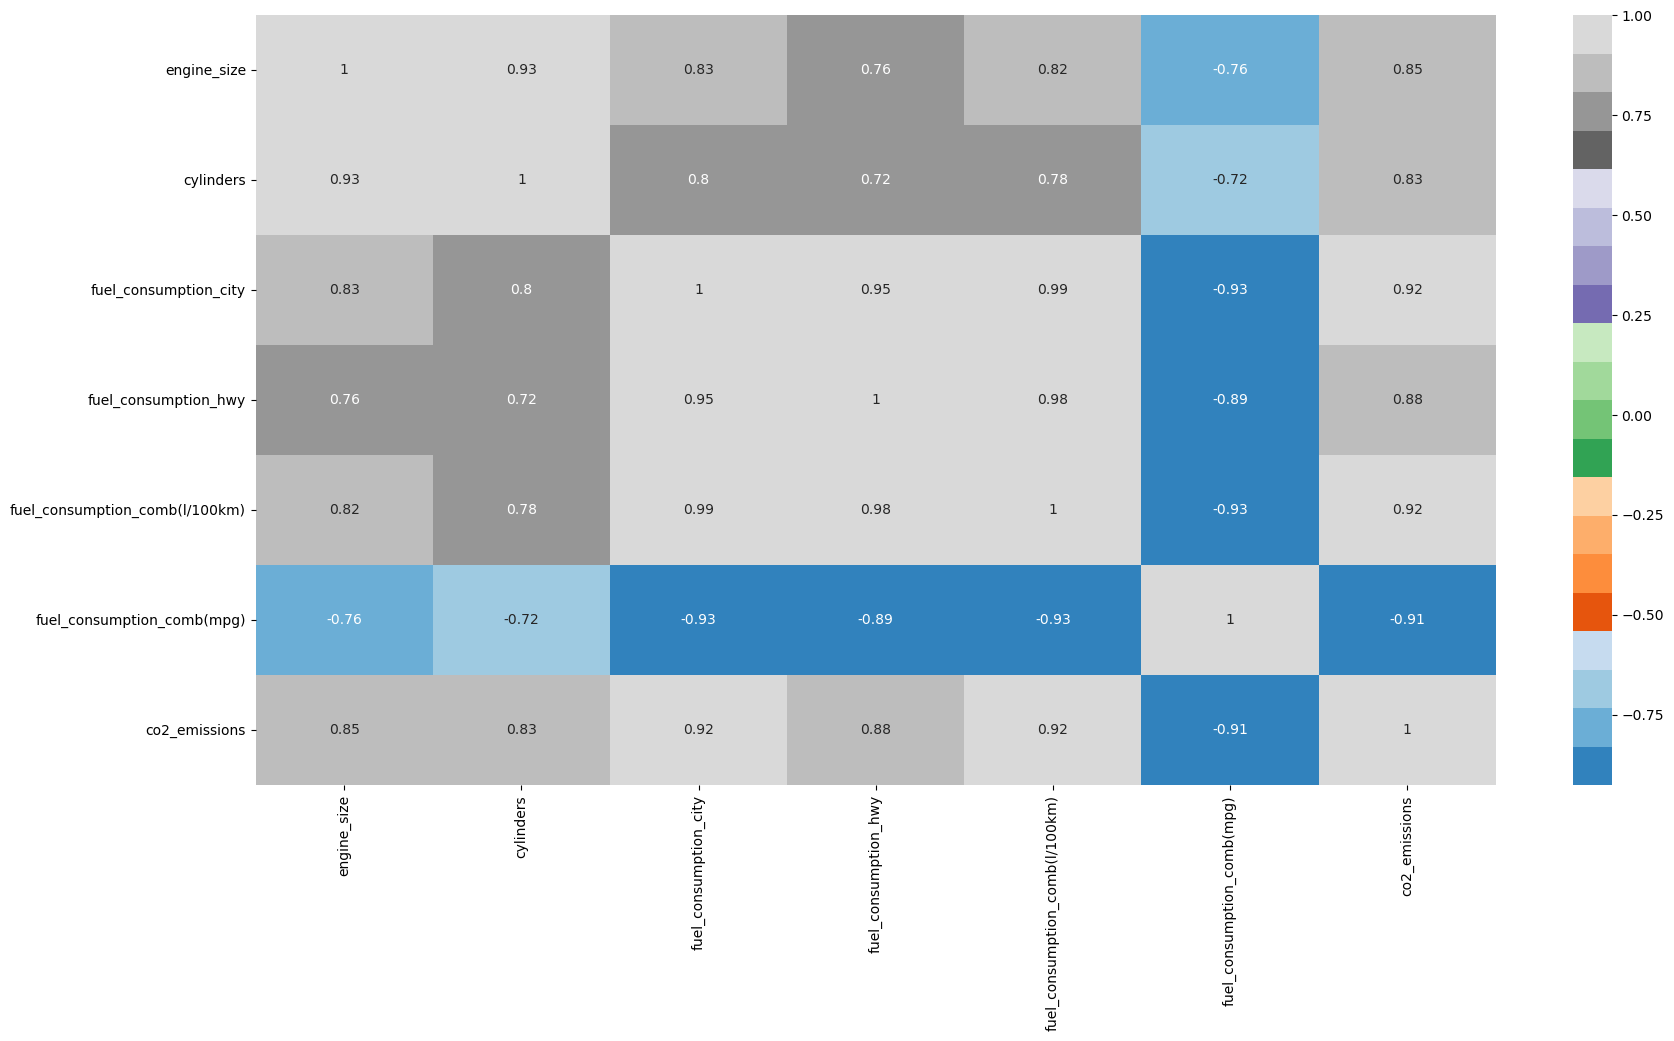

In [187]:
data_num_features = df.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

plt.figure(figsize=(20,10))

corr =  data_num_features.corr()

corre =data_num_features.corr(method='pearson')
sns.heatmap(corre, annot=True,cmap='tab20c')
plt.show()

In [188]:
#Correlation of independent features with dependent variable

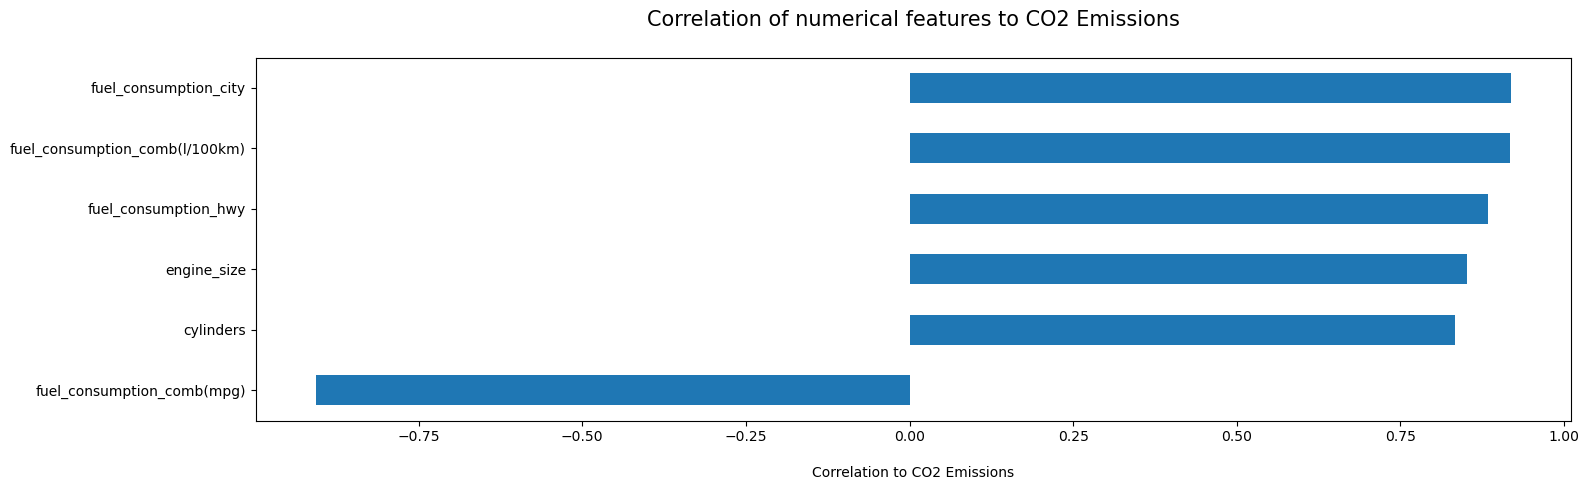

In [189]:
plt.figure(figsize=(16,5))
corr["co2_emissions"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to CO2 Emissions\n", fontsize=15)
plt.xlabel("\nCorrelation to CO2 Emissions")
plt.tight_layout()
plt.show()

In [190]:
#Variation in CO2 emissions with different features

In [191]:
#1.Feature: cylinders

Text(0, 0.5, 'CO2 Emissions(g/km)')

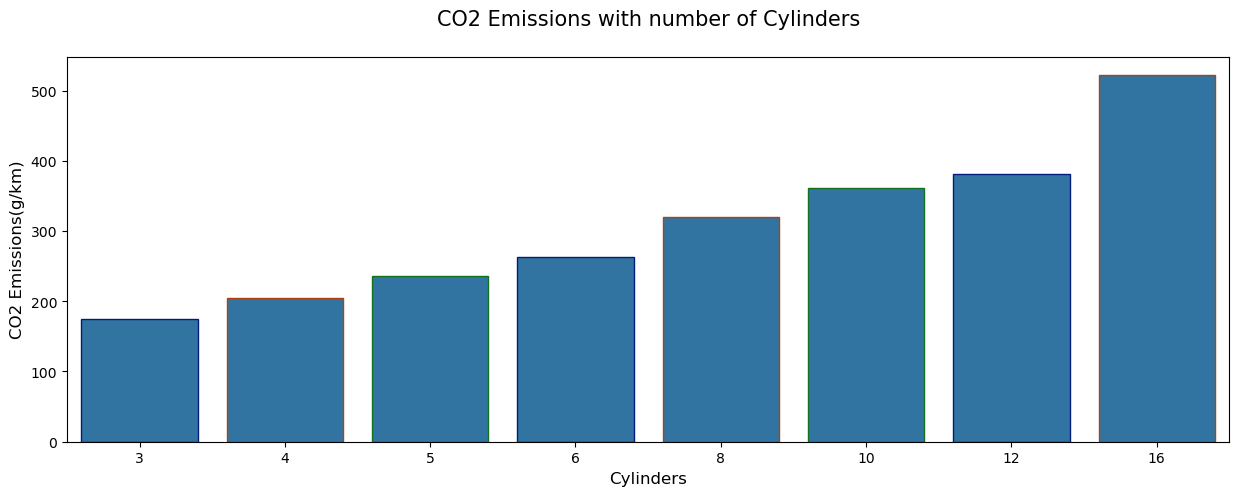

In [192]:
CO2_cylinder = df.groupby(['cylinders'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "cylinders",y="co2_emissions",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

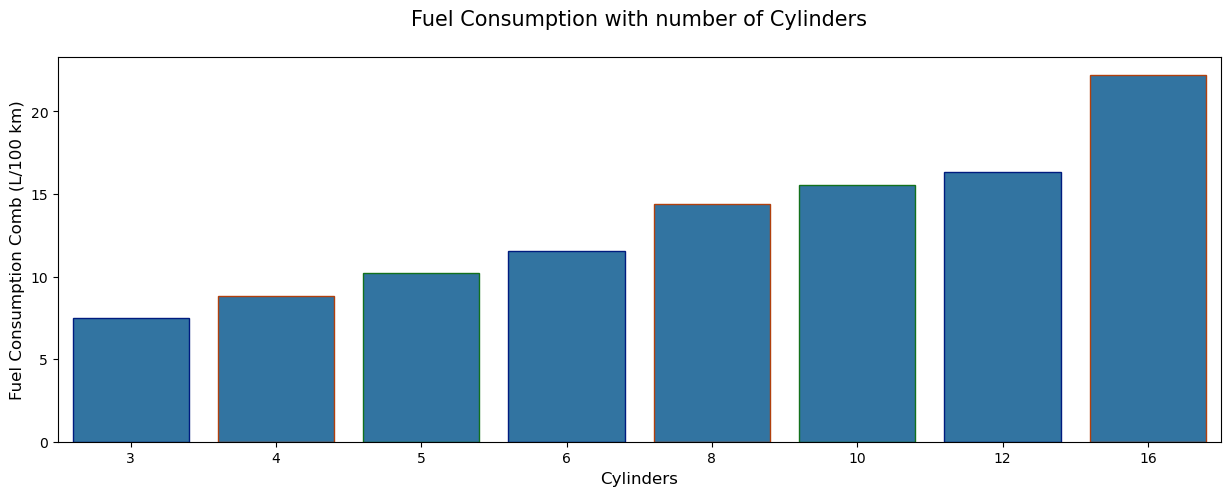

In [193]:
fuel_cylinder = df.groupby(['cylinders'])['fuel_consumption_comb(l/100km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "cylinders",y="fuel_consumption_comb(l/100km)",data = fuel_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

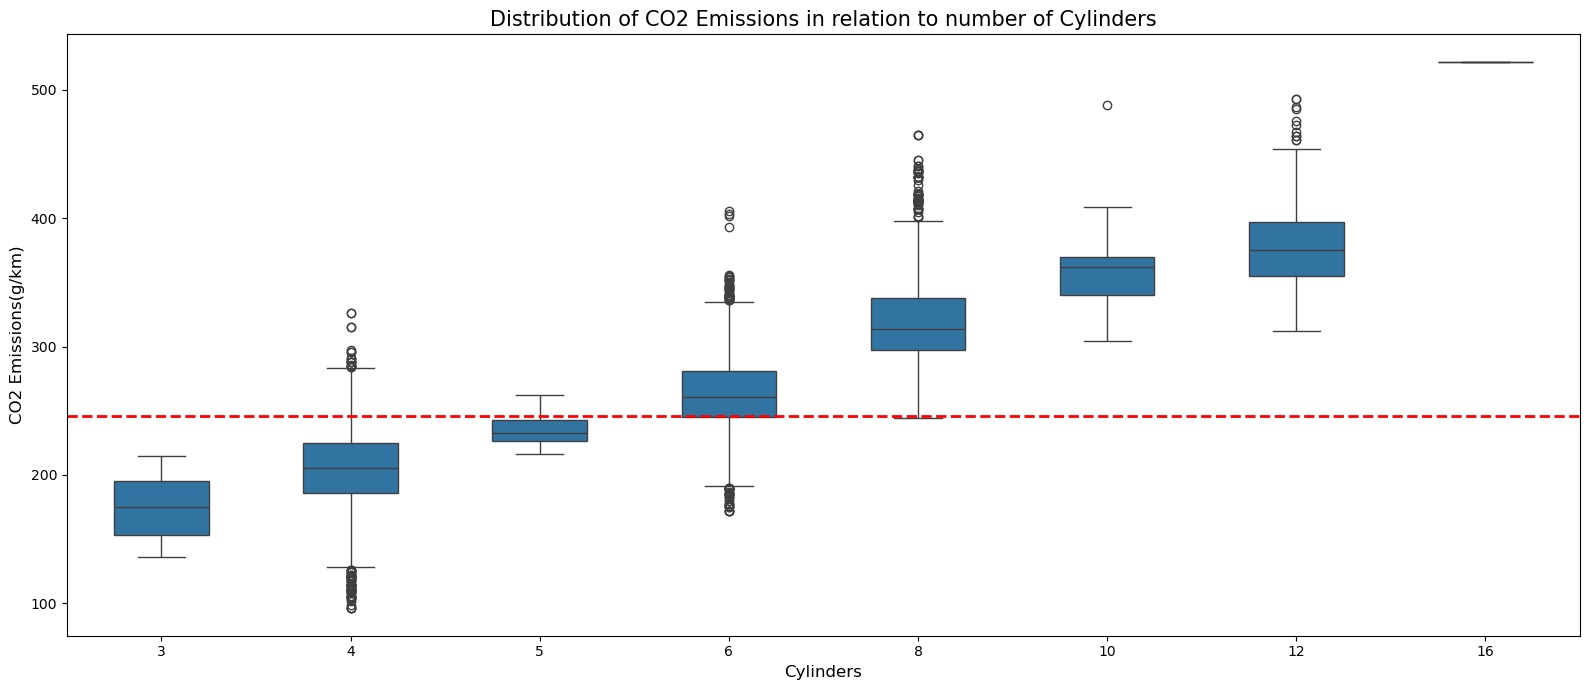

In [194]:
plt.figure(figsize=(16,7))
order = df.groupby("cylinders")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="cylinders", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [195]:
#2. Feature: engine_size

Text(0, 0.5, 'CO2 Emissions(g/km)')

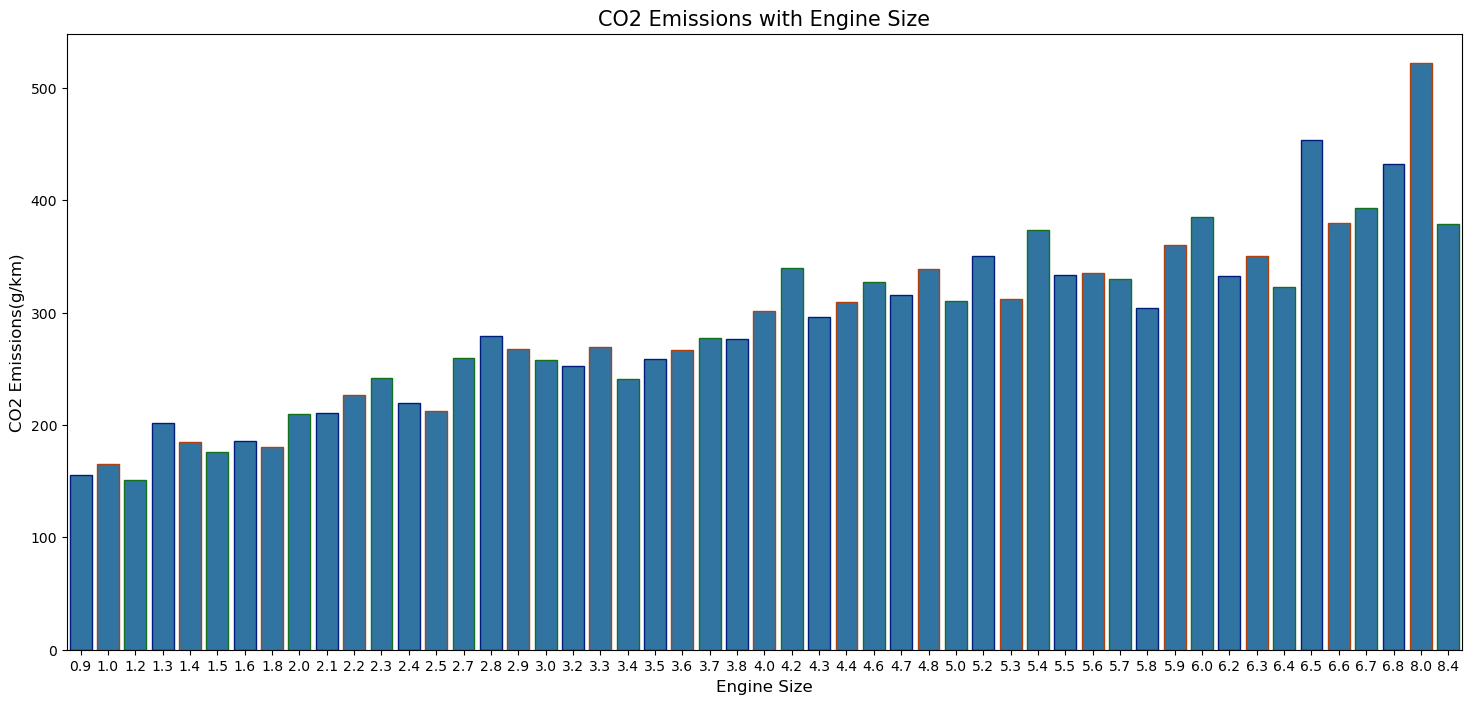

In [196]:
CO2_engine = df.groupby(['engine_size'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "engine_size",y="co2_emissions",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

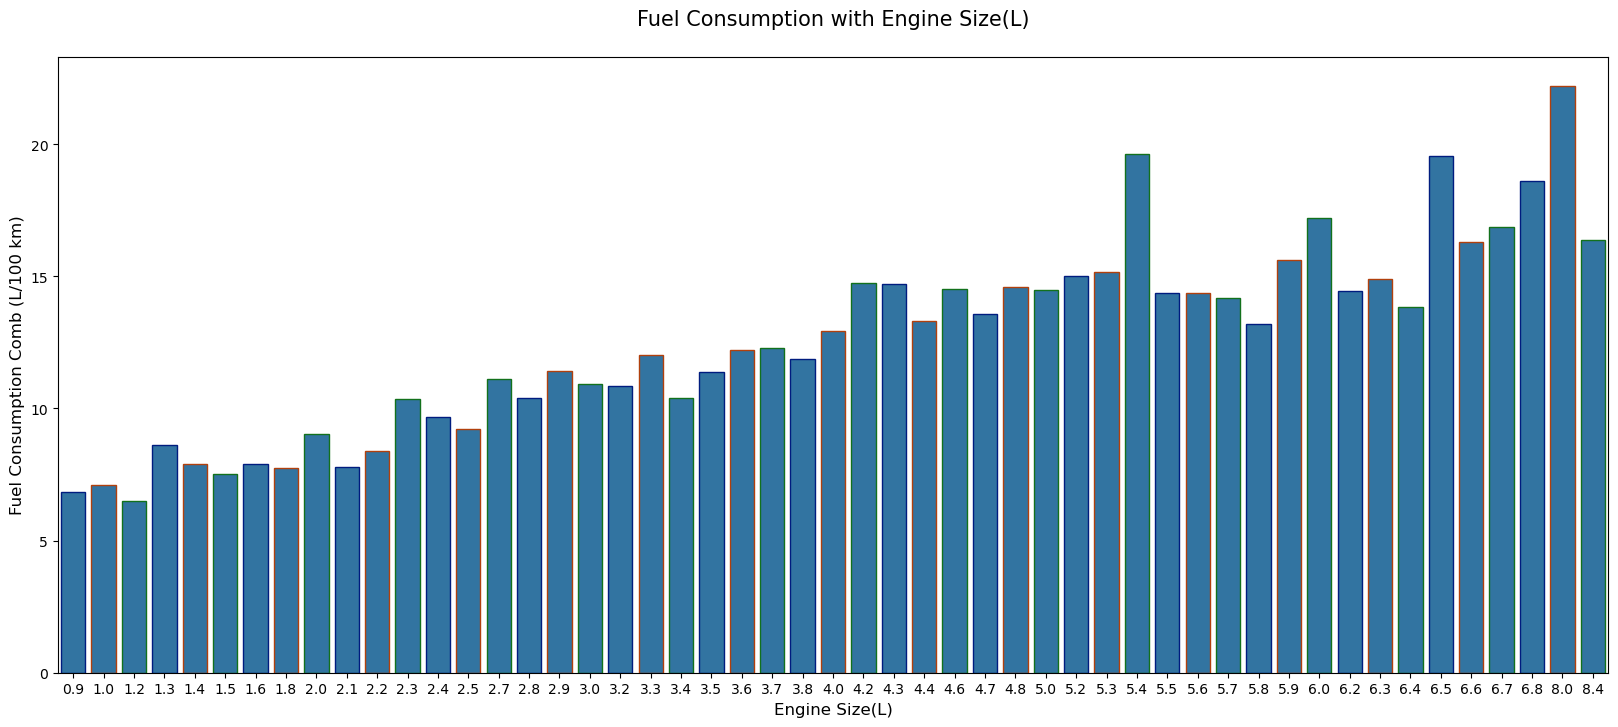

In [197]:
fuel_engine = df.groupby(['engine_size'])['fuel_consumption_comb(l/100km)'].mean().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "engine_size",y="fuel_consumption_comb(l/100km)",data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with Engine Size(L)\n', fontsize=15)
plt.xlabel('Engine Size(L)', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

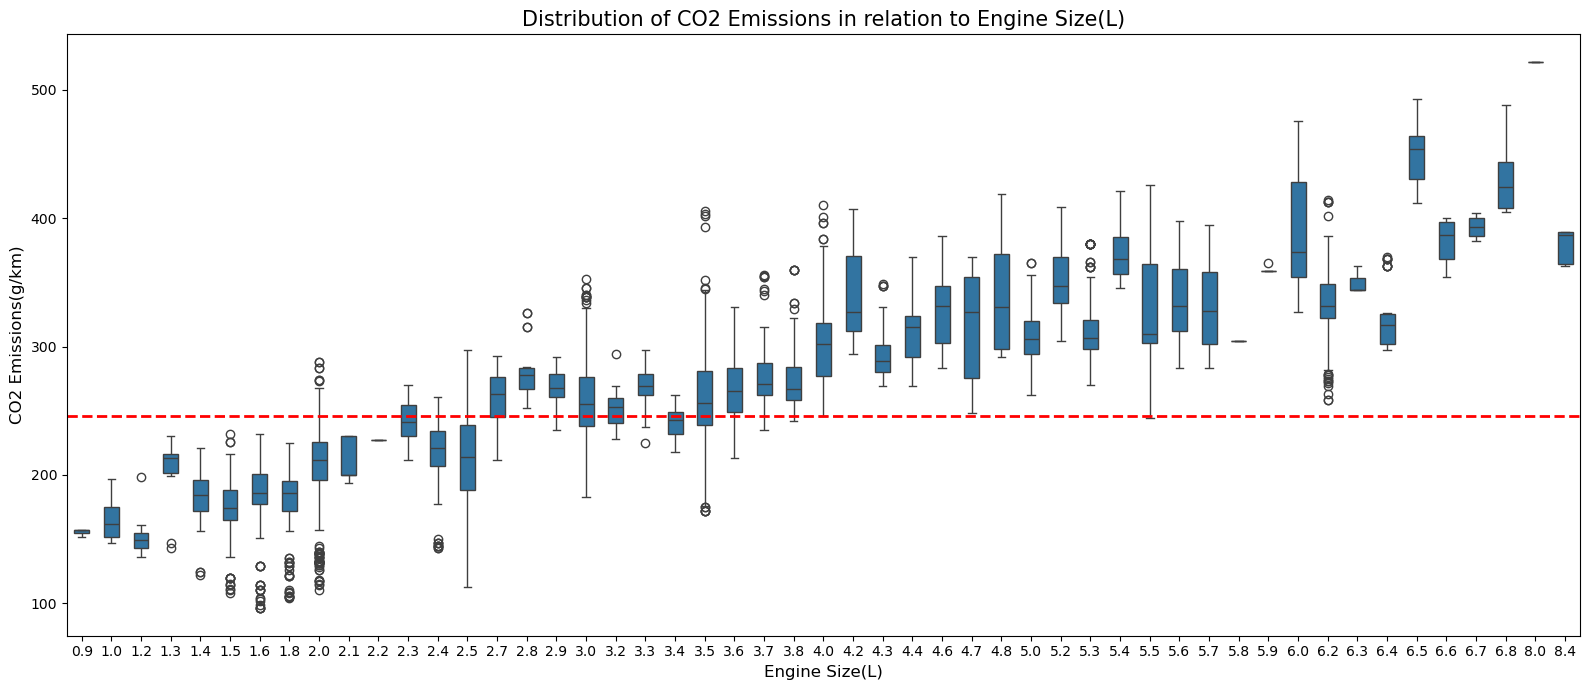

In [198]:
plt.figure(figsize=(16,7))
order = df.groupby("engine_size")["co2_emissions"].median().index
sns.boxplot(x="engine_size", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("Engine Size(L)", fontsize = 12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [199]:
#3. Feature : Fuel Consumption City (L/100 km)

Text(0, 0.5, 'CO2 Emissions(g/km)')

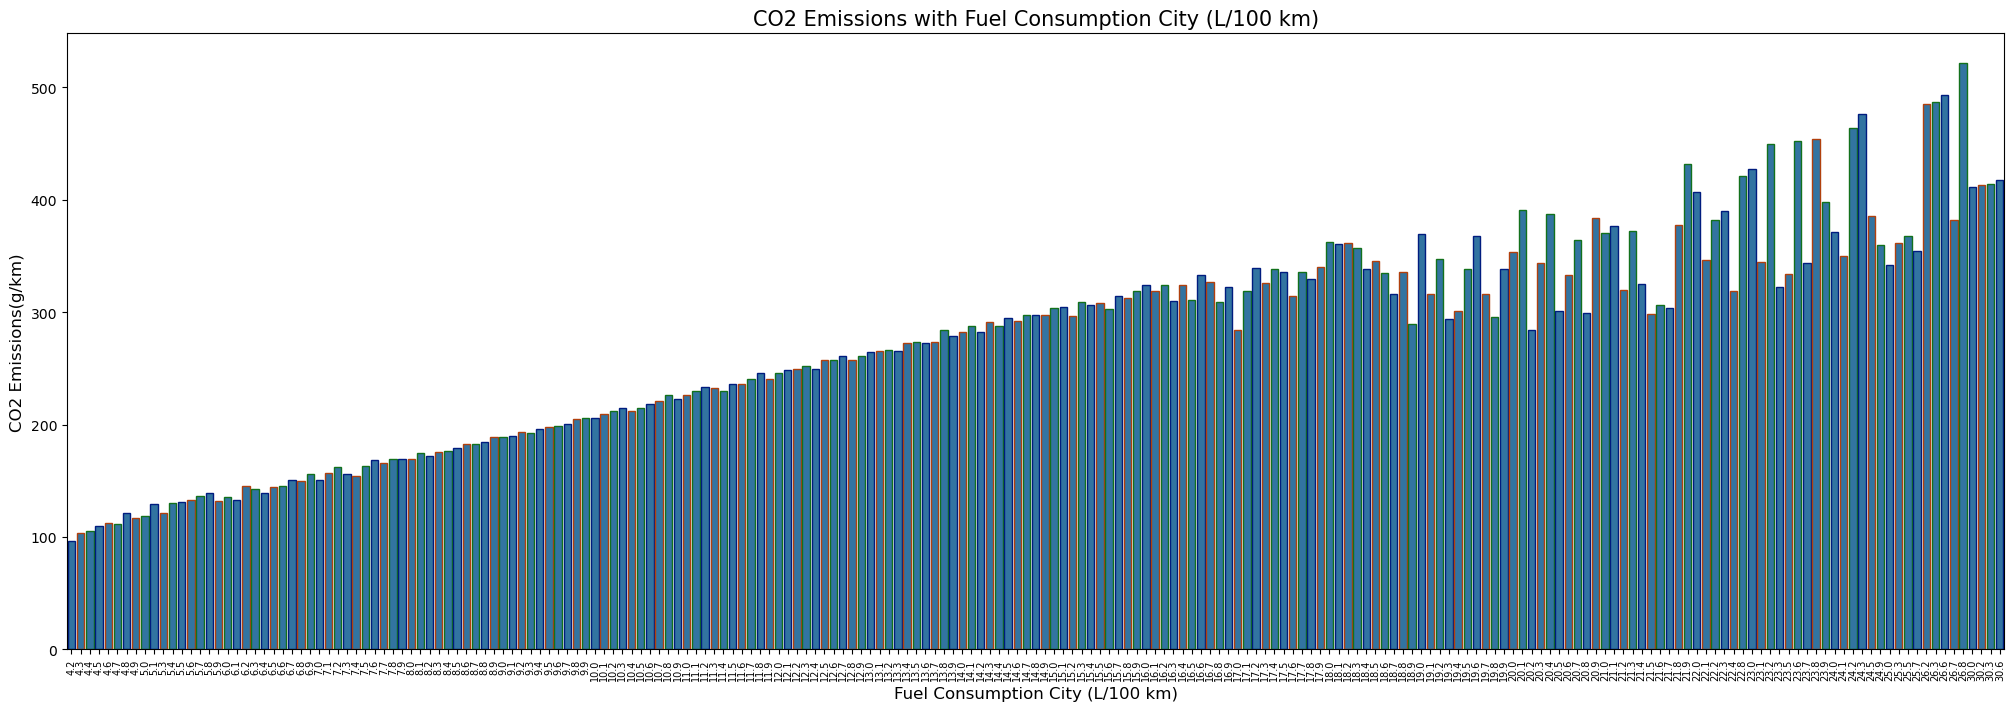

In [200]:
CO2_city = df.groupby(['fuel_consumption_city'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_city", y="co2_emissions",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

In [201]:
#4. Feature : Fuel Consumption Hwy (L/100 km)

Text(0, 0.5, 'CO2 Emissions(g/km)')

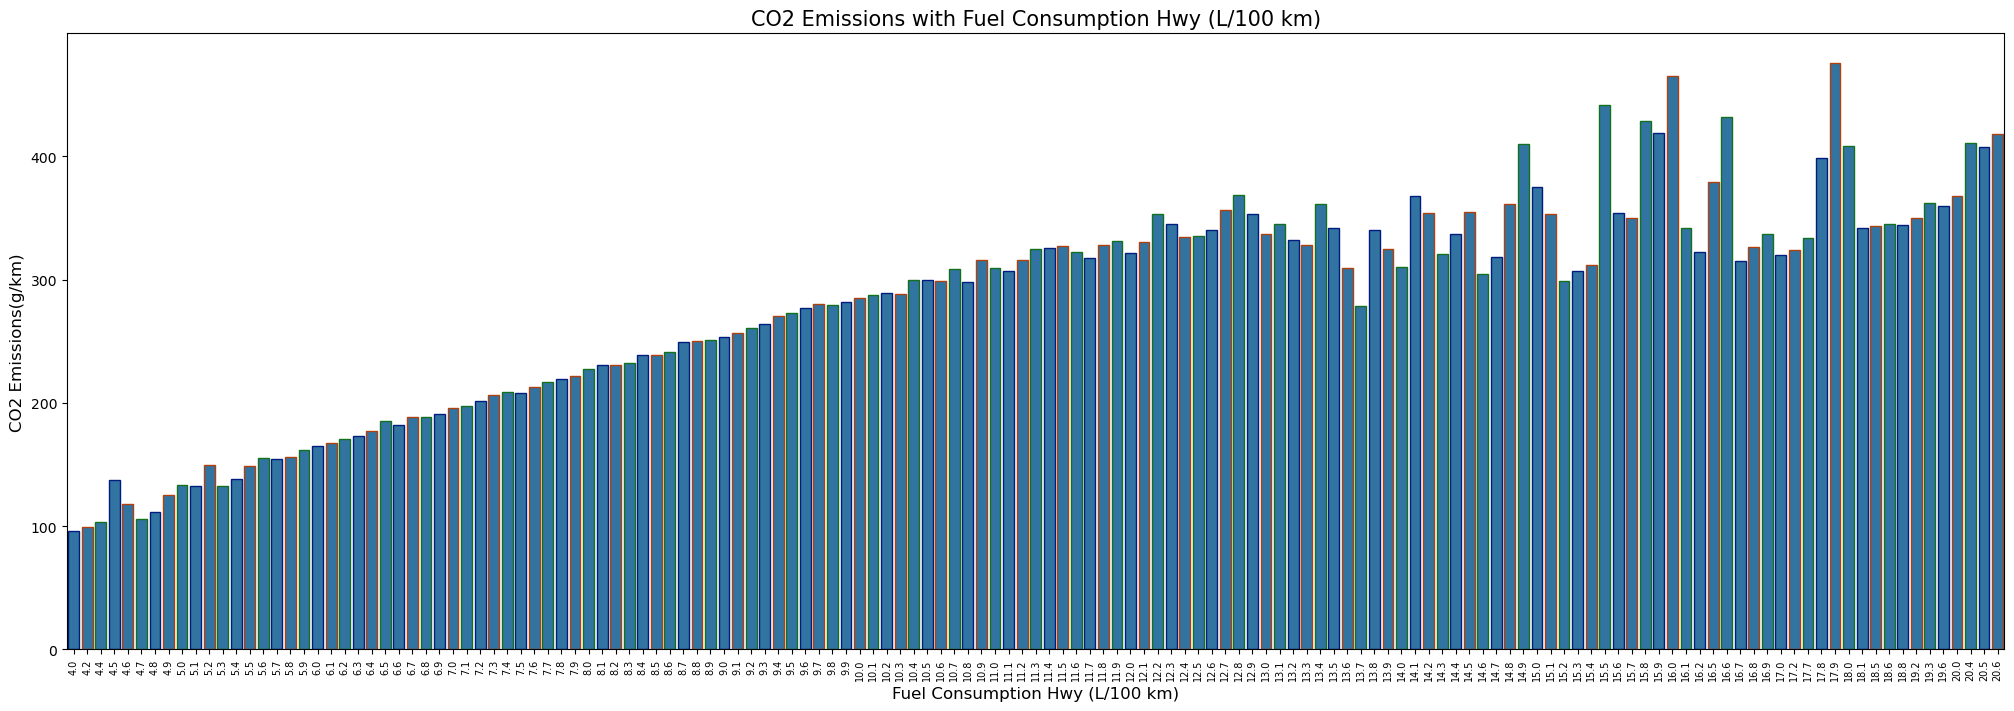

In [202]:
CO2_hwy = df.groupby(['fuel_consumption_hwy'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_hwy", y="co2_emissions",data = CO2_hwy,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Hwy (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

In [203]:
#5. Feature : Fuel Consumption Comb (L/100 km)

Text(0, 0.5, 'CO2 Emissions(g/km)')

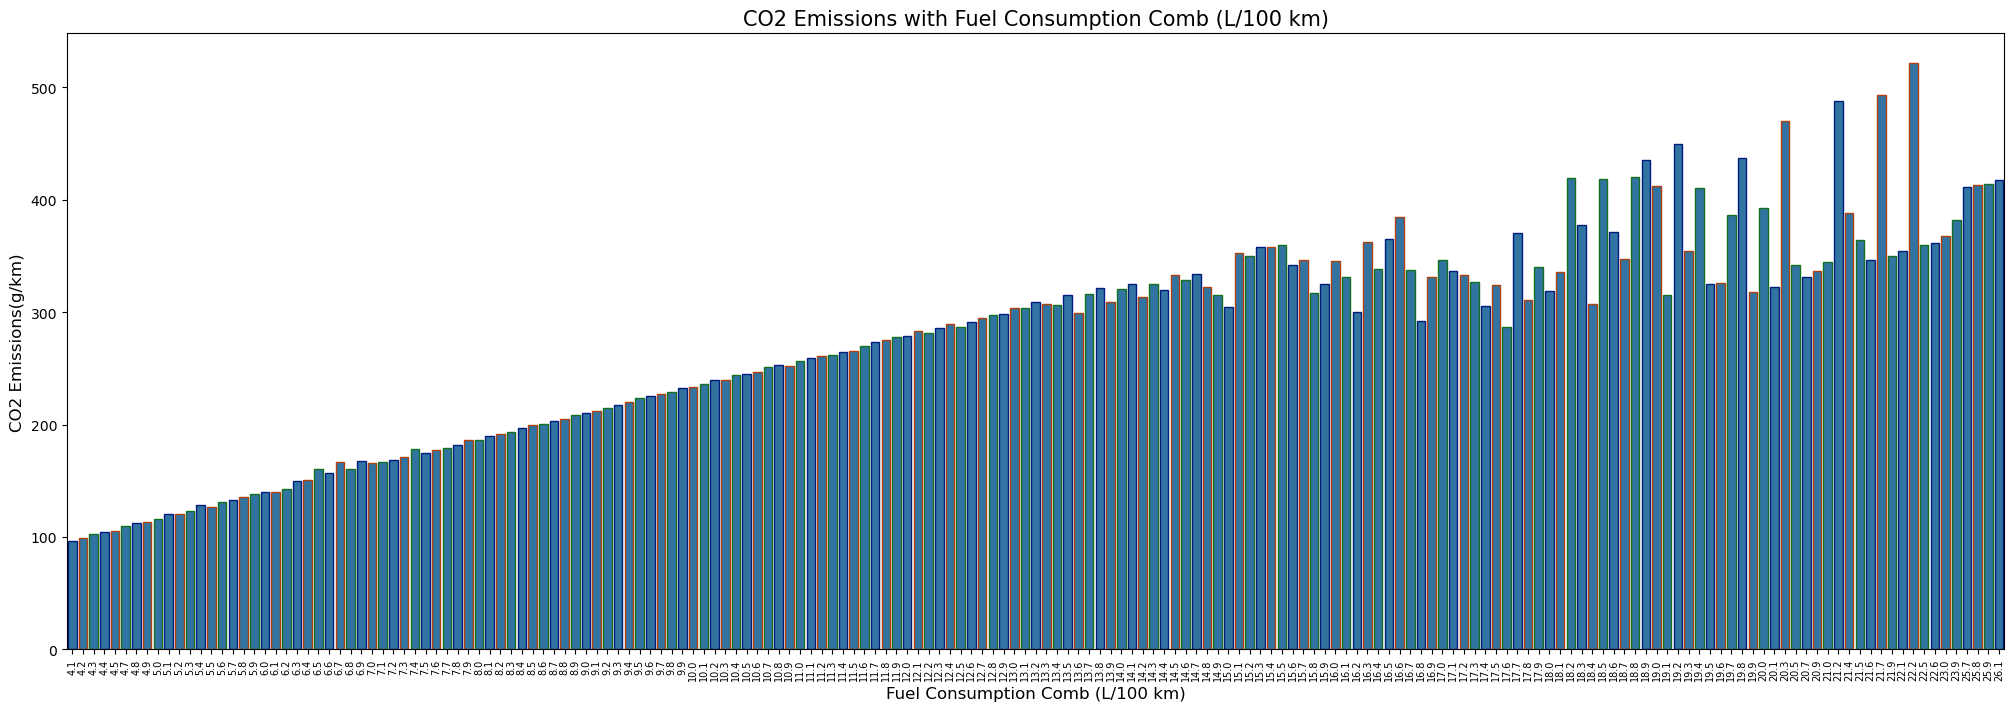

In [204]:
CO2_comb = df.groupby(['fuel_consumption_comb(l/100km)'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_comb(l/100km)", y="co2_emissions",data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

In [205]:
#6. Feature : Fuel Consumption Comb (mpg)

Text(0, 0.5, 'CO2 Emissions(g/km)')

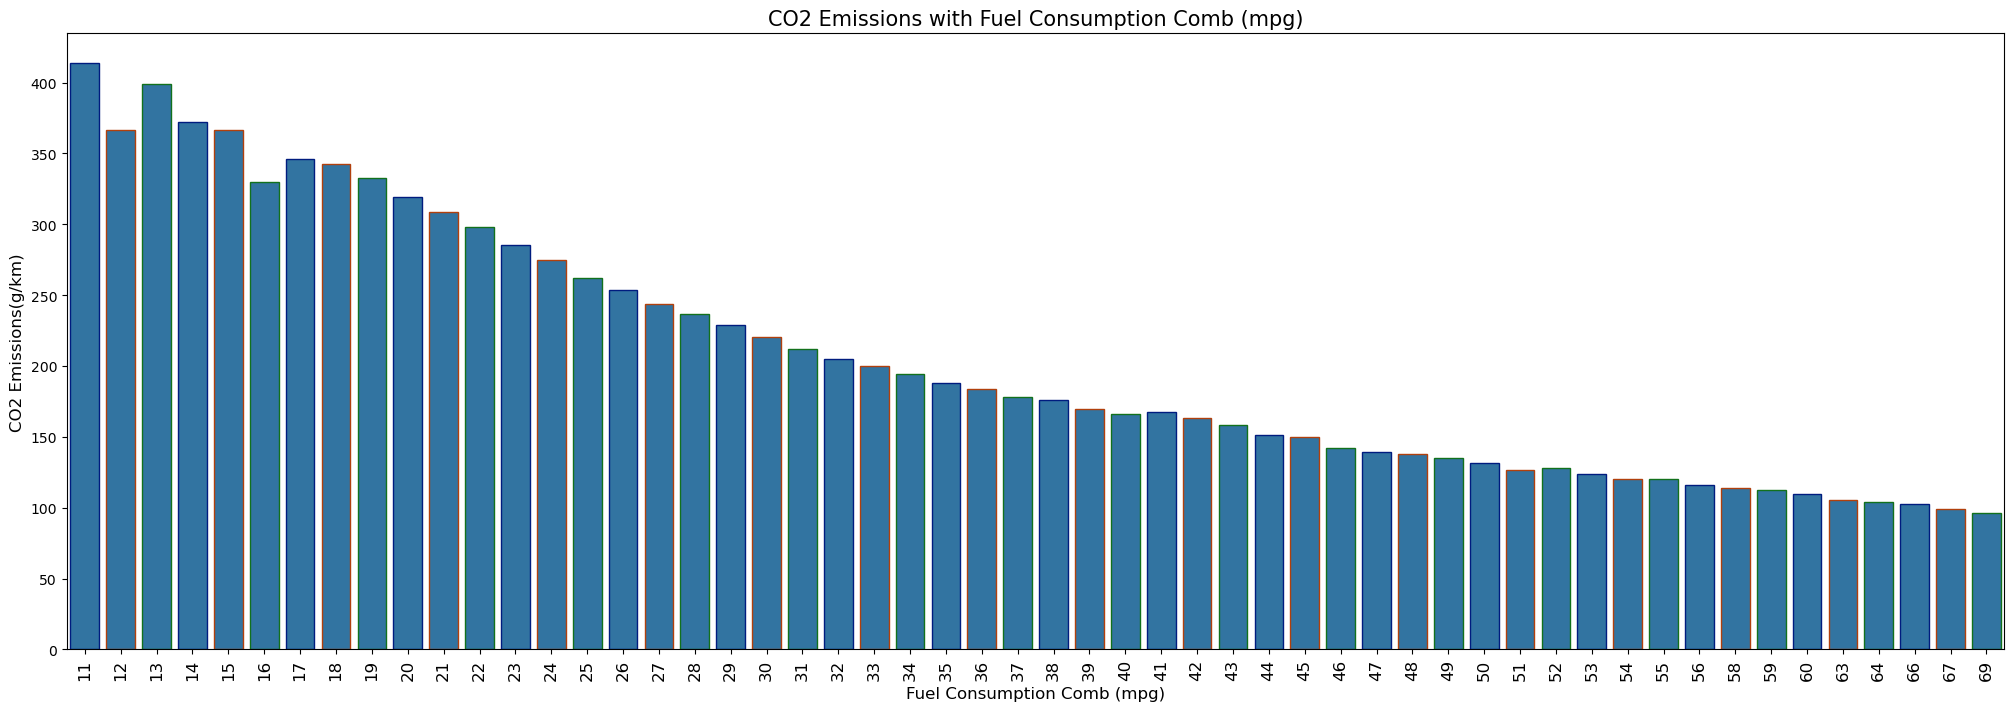

In [206]:
CO2_comb_mpg = df.groupby(['fuel_consumption_comb(mpg)'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_comb(mpg)", y="co2_emissions",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

In [207]:
# Feature Engineering

In [208]:
df_dummies = pd.get_dummies(df[["fuel_type","transmission","make","vehicle_class"]], drop_first = True)
df_dummies = df_dummies.replace({True: 1, False: 0})
df_num_features=df.select_dtypes(include=np.number)

df_comb = pd.concat([df_num_features, df_dummies], axis = 1)


In [209]:
df_comb.head()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,fuel_type_Ethanol(E85),fuel_type_Natural Gas,fuel_type_Premium Gasoline,...,vehicle_class_PICKUP TRUCK - STANDARD,vehicle_class_SPECIAL PURPOSE VEHICLE,vehicle_class_STATION WAGON - MID-SIZE,vehicle_class_STATION WAGON - SMALL,vehicle_class_SUBCOMPACT,vehicle_class_SUV - SMALL,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,196,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,136,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,255,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,244,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [210]:
std =StandardScaler()
df_comb['fuel_mpg_std'] = std.fit_transform(df_comb[['fuel_consumption_comb(mpg)']])
df_comb['co2_std'] = std.fit_transform(df_comb[['co2_emissions']])

In [211]:
df_comb.drop('fuel_consumption_comb(mpg)',axis=1,inplace=True)

In [212]:
df_comb.drop('co2_emissions',axis=1,inplace=True)

In [213]:
df_comb

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_type_Ethanol(E85),fuel_type_Natural Gas,fuel_type_Premium Gasoline,fuel_type_Regular Gasoline,transmission_Automatic,...,vehicle_class_STATION WAGON - MID-SIZE,vehicle_class_STATION WAGON - SMALL,vehicle_class_SUBCOMPACT,vehicle_class_SUV - SMALL,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER,fuel_mpg_std,co2_std
0,2.0,4,9.9,6.7,8.5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.763110,-0.932933
1,2.4,4,11.2,7.7,9.6,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.209966,-0.505646
2,1.5,4,6.0,5.8,5.9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2.837400,-1.958421
3,3.5,6,12.7,9.1,11.1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,-0.343178,0.075464
4,3.5,6,12.1,8.7,10.6,0,0,1,0,0,...,0,0,0,1,0,0,0,0,-0.066606,-0.112542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.348252,-0.539829
7381,2.0,4,11.2,8.3,9.9,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.209966,-0.317640
7382,2.0,4,11.7,8.6,10.3,0,0,1,0,0,...,0,0,0,1,0,0,0,0,-0.066606,-0.180908
7383,2.0,4,11.2,8.3,9.9,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0.209966,-0.317640


In [214]:
# Model Building

In [215]:
target = df_comb['co2_std']
target

0      -0.932933
1      -0.505646
2      -1.958421
3       0.075464
4      -0.112542
          ...   
7380   -0.539829
7381   -0.317640
7382   -0.180908
7383   -0.317640
7384   -0.044176
Name: co2_std, Length: 7385, dtype: float64

In [216]:
feature = df_comb.drop('co2_std',axis=1)

In [217]:
feature

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_type_Ethanol(E85),fuel_type_Natural Gas,fuel_type_Premium Gasoline,fuel_type_Regular Gasoline,transmission_Automatic,...,vehicle_class_SPECIAL PURPOSE VEHICLE,vehicle_class_STATION WAGON - MID-SIZE,vehicle_class_STATION WAGON - SMALL,vehicle_class_SUBCOMPACT,vehicle_class_SUV - SMALL,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER,fuel_mpg_std
0,2.0,4,9.9,6.7,8.5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.763110
1,2.4,4,11.2,7.7,9.6,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.209966
2,1.5,4,6.0,5.8,5.9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.837400
3,3.5,6,12.7,9.1,11.1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.343178
4,3.5,6,12.1,8.7,10.6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.066606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.348252
7381,2.0,4,11.2,8.3,9.9,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.209966
7382,2.0,4,11.7,8.6,10.3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.066606
7383,2.0,4,11.2,8.3,9.9,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.209966


In [218]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

print("X_train", x_train.shape)
print("y_train",y_train.shape)
print("X_test",x_test.shape)
print("y_test",y_test.shape)

X_train (5908, 70)
y_train (5908,)
X_test (1477, 70)
y_test (1477,)


In [219]:
#Model building-Linear Regression

def train_linear_regression_model(x_train, y_train):
    model = LinearRegression().fit(x_train, y_train)
    return model

def evaluate_model(model, x_train, y_train, x_test, y_test):
    lin_rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    lin_mse = round(mean_squared_error(y_test, model.predict(x_test)),4)
    lin_mae = round(mean_absolute_error(y_test, model.predict(x_test)),4)
    r2_train = model.score(x_train, y_train)
    lin_r2_score = cross_val_score(model, x_train, y_train, cv=10, scoring="r2").mean()
    return  lin_rmse,lin_mse,lin_mae, r2_train, lin_r2_score

def predict_and_compare(model, feature, target):
    pred = model.predict(feature)
    result_pred = pd.DataFrame({"Pred_Linear": pred, "Real_Value": target.values})
    result_pred["Pred_Linear"] = result_pred["Pred_Linear"].round(2)
    result_pred["Diff"] = result_pred["Pred_Linear"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming x_train, y_train, x_test, y_test, feature, and target are defined
    model = train_linear_regression_model(x_train, y_train)
    lin_rmse,lin_mse,lin_mae, r2_train, lin_r2_score = evaluate_model(model, x_train, y_train,x_test, y_test)
    print(f"Root Mean square Error: {lin_rmse}")
    print(f"Mean Square Error :, {lin_mse}")
    print(f"Mean Absolute Error :, {lin_mae}")
    print(f"R^2 score : {r2_train}")
    print(f"Cross-validated R^2 score: {lin_r2_score}")
    lin_pred, mean_diff = predict_and_compare(model, feature, target)
    print(f"Mean Difference: {mean_diff}")

Root Mean square Error: 0.0967175890629044
Mean Square Error :, 0.0094
Mean Absolute Error :, 0.0531
R^2 score : 0.9937452345530756
Cross-validated R^2 score: 0.9934882323531611
Mean Difference: 0.04954705011100459


In [220]:
# Model = Lasso

In [221]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [222]:
def lasso_model(x_train, y_train):
    model = Lasso().fit(x_train, y_train)
    return model

def evaluate_model(model, x_train, y_train, x_test, y_test):
    lasso_rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    lasso_mse = round(mean_squared_error(y_test, model.predict(x_test)),4)
    lasso_mae = round(mean_absolute_error(y_test, model.predict(x_test)),4)
    r2_train = model.score(x_train, y_train)
    lasso_r2_score = cross_val_score(model, x_train, y_train, cv=10, scoring="r2").mean()
    return  lasso_rmse,lasso_mse,lasso_mae, r2_train, lasso_r2_score

def predict_and_compare(model, feature, target):
    pred = model.predict(feature)
    result_pred = pd.DataFrame({"Pred_Lasso": pred, "Real_Value": target.values})
    result_pred["Pred_Lasso"] = result_pred["Pred_Lasso"].round(2)
    result_pred["Diff"] = result_pred["Pred_Lasso"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming x_train, y_train, x_test, y_test, feature, and targtet are defined
    model =lasso_model(x_train, y_train)
    lasso_rmse,lasso_mse,lasso_mae, r2_train, lasso_r2_score = evaluate_model(model, x_train, y_train,x_test, y_test)
    print(f"Root Mean square Error: {lasso_rmse}")
    print(f"Mean Square Error :, {lasso_mse}")
    print(f"Mean Absolute Error :, {lasso_mae}")
    print(f"R^2 score : {r2_train}")
    print(f"Cross-validated R^2 score: {lasso_r2_score}")
    lasso_pred, mean_diff = predict_and_compare(model, feature, target)
    print(f"Mean Difference: {mean_diff}")

Root Mean square Error: 0.4916795129860307
Mean Square Error :, 0.2417
Mean Absolute Error :, 0.3923
R^2 score : 0.7648997500032911
Cross-validated R^2 score: 0.7641023321919709
Mean Difference: 0.3870263907866124


In [223]:
# Model = Ridge

In [224]:
def ridge_model(x_train, y_train):
    model = Ridge().fit(x_train, y_train)
    return model

def evaluate_model(model, x_train, y_train, x_test, y_test):
    rid_rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    rid_mse = round(mean_squared_error(y_test, model.predict(x_test)),4)
    rid_mae = round(mean_absolute_error(y_test, model.predict(x_test)),4)
    r2_train = model.score(x_train, y_train)
    ridge_r2_score = cross_val_score(model, x_train, y_train, cv=10, scoring="r2").mean()
    return  rid_rmse,rid_mse,rid_mae, r2_train, ridge_r2_score

def predict_and_compare(model, feature, target):
    pred = model.predict(feature)
    result_pred = pd.DataFrame({"Pred_ridge": pred, "Real_Value": target.values})
    result_pred["Pred_ridge"] = result_pred["Pred_ridge"].round(2)
    result_pred["Diff"] = result_pred["Pred_ridge"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming x_train, y_train, x_test, y_test, feature, and target are defined
    model =ridge_model(x_train, y_train)
    rid_rmse,rid_mse,rid_mae, r2_train, ridge_r2_score = evaluate_model(model, x_train, y_train,x_test, y_test)
    print(f"Root Mean square Error: {rid_rmse}")
    print(f"Mean Square Error :, {rid_mse}")
    print(f"Mean Absolute Error :, {rid_mae}")
    print(f"R^2 score : {r2_train}")
    print(f"Cross-validated R^2 score: {ridge_r2_score}")
    ridge_pred, mean_diff = predict_and_compare(model, feature, target)
    print(f"Mean Difference: {mean_diff}")

Root Mean square Error: 0.09614721798166878
Mean Square Error :, 0.0092
Mean Absolute Error :, 0.0534
R^2 score : 0.9937072329493543
Cross-validated R^2 score: 0.9934427320203387
Mean Difference: 0.05001047638533734


In [225]:
# Model = ElasticNet

In [226]:
def elastic_model(x_train, y_train):
    model = ElasticNet().fit(x_train, y_train)
    return model

def evaluate_model(model, x_train, y_train, x_test, y_test):
    elast_rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    elast_mse = round(mean_squared_error(y_test, model.predict(x_test)),4)
    elast_mae = round(mean_absolute_error(y_test, model.predict(x_test)),4)
    r2_train = model.score(x_train, y_train)
    elastic_r2_score = cross_val_score(model, x_train, y_train, cv=10, scoring="r2").mean()
    return  elast_rmse,elast_mse,elast_mae, r2_train, elastic_r2_score

def predict_and_compare(model, feature, target):
    pred = model.predict(feature)
    result_pred = pd.DataFrame({"Pred_Elastic": pred, "Real_Value": target.values})
    result_pred["Pred_Elastic"] = result_pred["Pred_Elastic"].round(2)
    result_pred["Diff"] = result_pred["Pred_Elastic"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming x_train, y_train, x_test, y_test, feature, and target are defined
    model =elastic_model(x_train, y_train)
    elast_rmse,elast_mse,elast_mae, r2_train, elastic_r2_score = evaluate_model(model, x_train, y_train,x_test, y_test)
    print(f"Root Mean square Error: {elast_rmse}")
    print(f"Mean Square Error :, {elast_mse}")
    print(f"Mean Absolute Error :, {elast_mae}")
    print(f"R^2 score : {r2_train}")
    print(f"Cross-validated R^2 score: {elastic_r2_score}")
    elastic_pred, mean_diff = predict_and_compare(model, feature, target)
    print(f"Mean Difference: {mean_diff}")

Root Mean square Error: 0.4347988563510833
Mean Square Error :, 0.1891
Mean Absolute Error :, 0.3321
R^2 score : 0.817102992787818
Cross-validated R^2 score: 0.8163212451726766
Mean Difference: 0.3262673077400499


In [227]:
# Model = Random Forest

In [228]:
def train_random_forest_model(x_train, y_train):
    rf_model = RandomForestRegressor()
    rf_model.fit(x_train, y_train)
    return rf_model

def evaluate_model(rf_model, x_train, y_train, x_test, y_test):
    rf_rmse = np.sqrt(mean_squared_error(y_test, rf_model.predict(x_test)))
    rf_mse = round(mean_squared_error(y_test, rf_model.predict(x_test)),4)
    rf_mae = round(mean_absolute_error(y_test, rf_model.predict(x_test)),4)
    r2_train = rf_model.score(x_train, y_train)
    rf_r2_score = cross_val_score(rf_model, x_train, y_train, cv=10, scoring="r2").mean()
    return  rf_rmse,rf_mse,rf_mae, r2_train, rf_r2_score

def predict_and_compare(model, feature,target):
    pred = rf_model.predict(feature)
    result_pred = pd.DataFrame({"Pred_RF": pred, "Real_Value": target.values})
    result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
    result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming x_train, y_train, x_test, y_test, feature, and target are defined
    rf_model = train_random_forest_model(x_train, y_train)
    rf_rmse,rf_mse,rf_mae, r2_train, rf_r2_score = evaluate_model(rf_model, x_train, y_train,x_test, y_test)
    print(f"Root Mean square Error: {rf_rmse}")
    print(f"Mean Square Error :, {rf_mse}")
    print(f"Mean Absolute Error :, {rf_mae}")
    print(f"R^2 score : {r2_train}")
    print(f"Cross-validated R^2 score: {rf_r2_score}")
    random_forest_pred, mean_diff = predict_and_compare(rf_model, feature, target)
    print(f"Mean Difference: {mean_diff}")

Root Mean square Error: 0.07192229391344715
Mean Square Error :, 0.0052
Mean Absolute Error :, 0.0355
R^2 score : 0.9993342803351745
Cross-validated R^2 score: 0.9967166921137631
Mean Difference: 0.019497400907636086


In [229]:
# Model-Support Vector Machine

In [230]:
def train_svr_model(x_train, y_train):
    model = SVR()
    model.fit(x_train, y_train)
    return model

def evaluate_model(model, x_train, y_train,x_test, y_test):
    svr_rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    svr_mse = round(mean_squared_error(y_test, model.predict(x_test)),4)
    svr_mae = round(mean_absolute_error(y_test, model.predict(x_test)),4)
    r2_train = model.score(x_train, y_train)
    svr_r2_score = cross_val_score(model, x_train, y_train, cv=10, scoring="r2").mean()
    return  svr_rmse,svr_mse,svr_mae, r2_train, svr_r2_score

def predict_and_compare(model,feature, target):
    pred = model.predict(feature)
    result_pred = pd.DataFrame({"Pred_SVR": pred, "Real_Value": target.values})
    result_pred["Pred_SVR"] = result_pred["Pred_SVR"].round(2)
    result_pred["Diff"] = result_pred["Pred_SVR"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming x_train, y_train, x_test, y_test, feature, target are defined
    model = train_svr_model(x_train, y_train)
    svr_rmse,svr_mse,svr_mae, r2_train, svr_r2_score = evaluate_model(model, x_train, y_train,x_test, y_test)
    print(f"Root Mean square Error: {svr_rmse}")
    print(f"Mean Square Error :, {svr_mse}")
    print(f"Mean Absolute Error :, {svr_mae}")
    print(f"R^2 score : {r2_train}")
    print(f"Cross-validated R^2 score: {svr_r2_score}")
    svr_pred, mean_diff = predict_and_compare(model, feature, target)
    print(f"Mean Difference: {mean_diff}")

Root Mean square Error: 0.1324065187922384
Mean Square Error :, 0.0175
Mean Absolute Error :, 0.0766
R^2 score : 0.9849263001533525
Cross-validated R^2 score: 0.9827188854147921
Mean Difference: 0.07190657754191099


In [231]:
data = {"Model": ["Linear Regression","Lasso","Ridge","Elastic Net", "Random Forest","SVR"], "RMSE": [lin_rmse,lasso_rmse,rid_rmse,elast_rmse,rf_rmse,svr_rmse],"MSE": [lin_mse,lasso_mse,rid_mse,elast_mse,rf_mse,svr_mse],"MAE": [lin_mae,lasso_mae,rid_mae,elast_mae,rf_mae,svr_mae],"R2 Score": [lin_r2_score,lasso_r2_score,ridge_r2_score,elastic_r2_score,rf_r2_score,svr_r2_score]}
df=pd.DataFrame(data)
df

,Model,RMSE,MSE,MAE,R2 Score
0,Linear Regression,0.096718,0.0094,0.0531,0.993488
1,Lasso,0.491680,0.2417,0.3923,0.764102
2,Ridge,0.096147,0.0092,0.0534,0.993443
3,Elastic Net,0.434799,0.1891,0.3321,0.816321
4,Random Forest,0.071922,0.0052,0.0355,0.996717
5,SVR,0.132407,0.0175,0.0766,0.982719


In [232]:
# As the Random Forest is giving the best accuracy,so we are deploying the Random Forest Regressor Model

In [233]:
file = 'rf_model.pkl'

In [234]:
import pickle

In [235]:
pickle.dump(rf_model,open(file,'wb'))